# Relaxation effects for Goethite

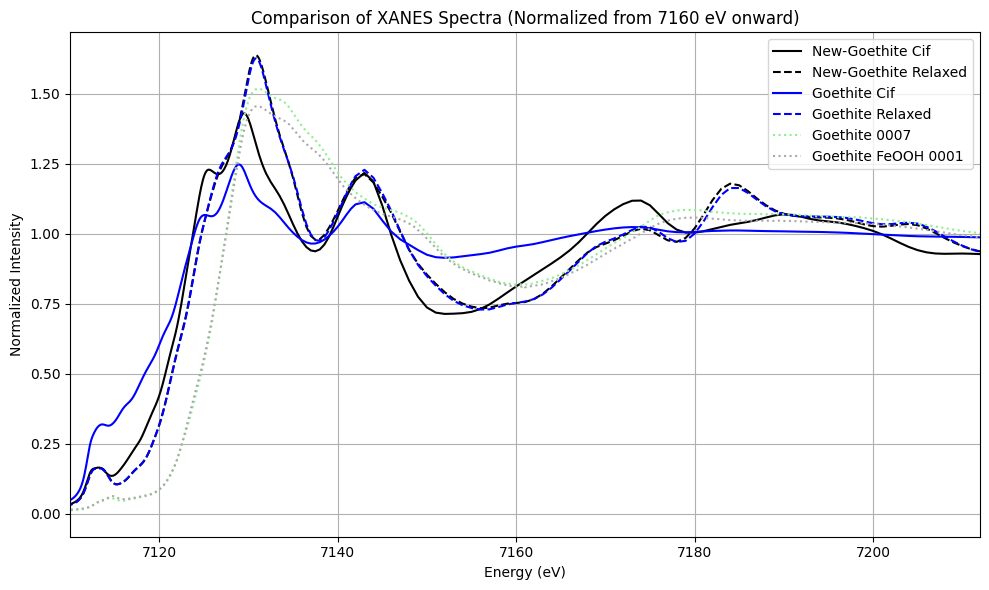

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Simulated Files ---
simulated_files = [
    './New-Goethite/fdmnes.out_Gm2_conv.txt',
    './New-Goethite/relaxed/fdmnes.out_Gm2_conv.txt',
    './Goethite/fdmnes.out_Gm2_conv.txt',
    './Goethite/relaxed/fdmnes.out_Gm2_conv.txt'
]

simulated_labels = ['New-Goethite Cif', 'New-Goethite Relaxed', 'Goethite Cif', 'Goethite Relaxed']
simulated_colors = ['black', 'black', 'blue', 'blue']
linestyles = ['-', '--', '-', '--']

# --- Experimental Files ---
#padrao_file = './Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
goe1 = 'Goethite_0007.dat'
goe2 = 'Gohetita_FeOOH_0001.dat'

shift = 1.5

plt.figure(figsize=(10, 6))

# Plot simulated files
for i, file in enumerate(simulated_files):
    try:
        # Use a raw string for the separator
        data = pd.read_csv(file, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        # Normalize with average intensity for Energy >= 7160
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        plt.plot(data['Energy'], data['Intensity'], label=simulated_labels[i], linestyle=linestyles[i], color=simulated_colors[i])
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Plot "Padrão 1" (average of columns 2, 3, 4)
try:
    # Use a raw string for the separator
    #df_padrao = pd.read_csv(padrao_file, sep=r'\s+', header=None, skiprows=3)
    #df_padrao['Avg'] = df_padrao[[1, 2, 3]].mean(axis=1)
    #plt.plot(df_padrao[0], df_padrao['Avg'], label='Padrão 1', color='green', linewidth=2, linestyle='-')
    df_goe1 = pd.read_csv(goe1, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    df_goe2 = pd.read_csv(goe2, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    plt.plot(df_goe1['Energy'], df_goe1['Intensity'], label='Goethite 0007', color='lightgreen', linestyle=':')
    plt.plot(df_goe2['Energy'], df_goe2['Intensity'], label='Goethite FeOOH 0001', color='darkgray', linestyle=':')
except Exception as e:
    print(f"Error processing padrão file: {e}")

# Plot average of 25 columns from experimental multi-spectra file
try:
    # Use a raw string for the separator
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)
    #plt.plot(df_multi[0], df_multi['Avg'], label='Exp1 (avg of 25)', color='navy', linestyle='--', linewidth=2)
except Exception as e:
    print(f"Error processing experimental file: {e}")

# Plot formatting
plt.xlabel("Energy (eV)")
plt.ylabel("Normalized Intensity")
plt.xlim(7110, 7212)
plt.title("Comparison of XANES Spectra (Normalized from 7160 eV onward)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optimizing convolution

Processing simulated files...

Processing experimental files...


/tmp/ipykernel_712777/1860084723.py:68: MatplotlibDeprecationWarning: Passing label as a length 5 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(data['Energy']+shift, data['Intensity'], label=label, color=colors[i], linewidth=1.5)
/tmp/ipykernel_712777/1860084723.py:68: MatplotlibDeprecationWarning: Passing label as a length 5 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(data['Energy']+shift, data['Intensity'], label=label, color=colors[i], linewidth=1.5)
/tmp/ipykernel_712777/1860084723.py:68: MatplotlibDeprecationWarning: Passing label as a length 5 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.

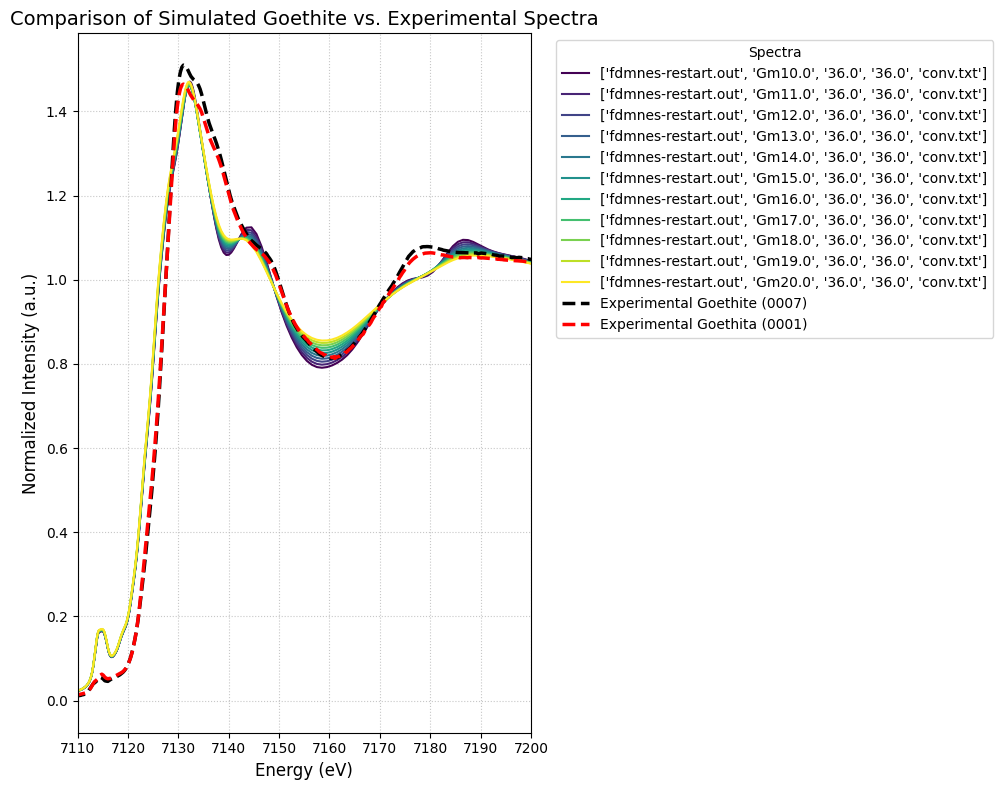

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# --- Configuration ---

# Directory containing the simulated goethite files
#simulated_dir = './New-Goethite/convs/'
simulated_dir = './Goethite/relaxed/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files to avoid overlap in the plot
# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm*_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- Plotting ---

plt.figure(figsize=(12, 8))

# --- Plot Simulated Files ---
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))

print("Processing simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label = os.path.basename(file).split('_')#[1]
        
        # --- FIX 1: Skip the first row (header) and assign column names manually ---
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']

        # --- FIX 2: Ensure data is numeric and remove rows that fail conversion ---
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize with average intensity for Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file} (no data >= 7160 eV), skipping.")
            continue
            
        plt.plot(data['Energy']+shift, data['Intensity'], label=label, color=colors[i], linewidth=1.5)
        #print(f"  - Plotted {file}")

    except Exception as e:
        print(f"Error processing {file}: {e}")

# --- Plot Experimental Files ---
print("\nProcessing experimental files...")
for i, file in enumerate(exp_files):
    try:
        # --- FIX 3: Apply the same robust loading method to experimental files ---
        # Assuming they might also have a header. If not, this is still safer.
        data = pd.read_csv(file, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        if isinstance(data.iloc[0, 0], str):
             data = pd.read_csv(file, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file} (no data >= 7160 eV), skipping.")
            continue

        plt.plot(data['Energy'], data['Intensity'], 
                 label=exp_labels[i], 
                 color=exp_colors[i], 
                 linestyle='--', 
                 linewidth=2.5)
        #print(f"  - Plotted {file}")

    except Exception as e:
        print(f"Error processing {file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7200)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Loading and normalizing experimental files...
  - Loaded ./Goethite_0007.dat
  - Loaded ./Gohetita_FeOOH_0001.dat

Processing simulated files and calculating RMSE...

Optimization Complete.
Best simulated file: fdmnes-restart.out_Gm13.0_36.0_36.0_conv.txt
Lowest total RMSE: 0.1338

Plotting all simulated files...
Plotting experimental files...
Plotting best fit: Gm13.0


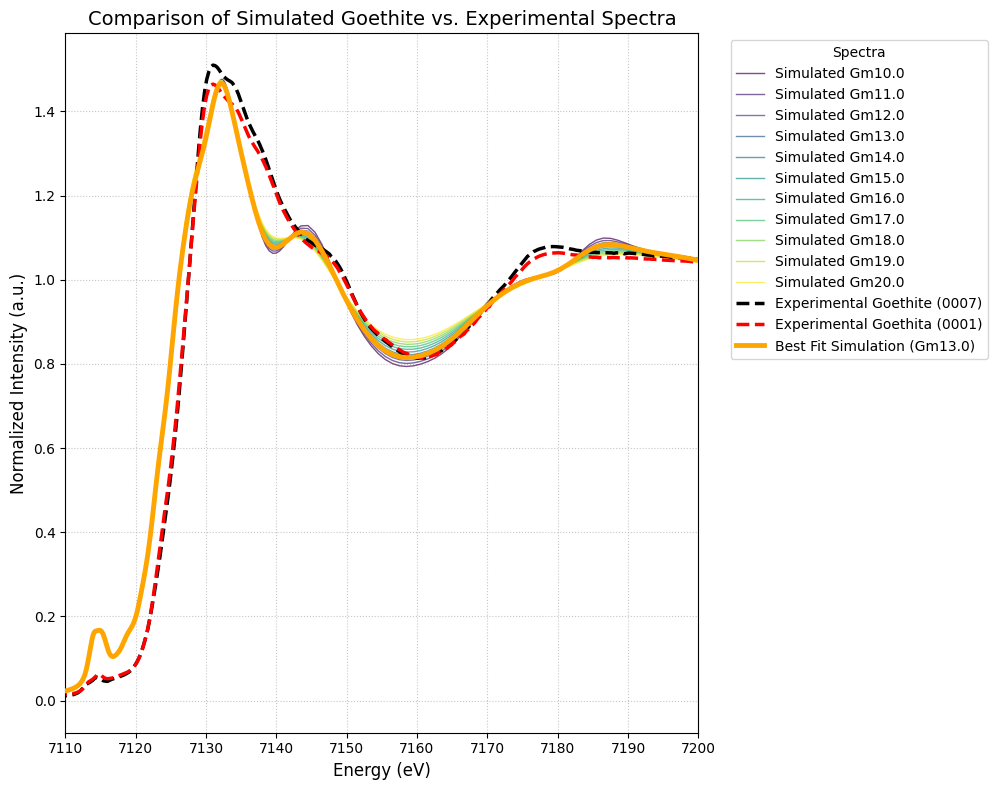

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './Goethite/relaxed/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm*36.0_36.0_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # print("Warning: No overlapping energy range for RMSE calculation.")
        return float('inf') # Return a very large value if no overlap

    # Create a common energy grid for interpolation
    common_energy_grid = np.linspace(min_energy, max_energy, 500) # 500 points for good resolution

    # Interpolate both spectra onto the common energy grid
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
experimental_data = {}
print("Loading and normalizing experimental files...")
for i, file_path in enumerate(exp_files):
    try:
        data = pd.read_csv(file_path, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        # This is a heuristic; more robust would be to know your file format or use skiprows if fixed
        if len(data) > 0 and isinstance(data.iloc[0, 0], str) and not data.iloc[0, 0].replace('.', '', 1).isdigit():
             data = pd.read_csv(file_path, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization as for simulated data
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file_path} (no data >= 7160 eV), skipping.")
            continue
        
        experimental_data[exp_labels[i]] = {'Energy': data['Energy'].values, 'Intensity': data['Intensity'].values}
        print(f"  - Loaded {file_path}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data:
    print("No experimental data loaded. Cannot proceed with RMSE calculation.")
    exit() # Exit if no experimental data is available

# --- Initialize for Best Fit ---
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift  # Apply the shift to the energy values
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # print(f"Could not normalize {file} (no data >= 7160 eV), skipping for RMSE.")
            continue # Skip this file if normalization fails

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for each experimental spectrum
        current_total_rmse = 0
        for label, exp_data in experimental_data.items():
            rmse = calculate_rmse(sim_energy, sim_intensity, exp_data['Energy'], exp_data['Intensity'])
            if rmse == float('inf'): # If no overlap, this simulation is bad for this exp data
                current_total_rmse = float('inf')
                break # No need to check other experimental data for this sim file
            current_total_rmse += rmse
        
        # Update best fit if current simulation is better
        if current_total_rmse < best_total_rmse:
            best_total_rmse = current_total_rmse
            best_simulated_file = file
            # Store the data for the best simulation directly
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with RMSE: {current_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE: {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation.")

# --- Plotting ---

plt.figure(figsize=(12, 8))

# Plot all simulated files (optional, can be removed to only plot best fit)
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract just the Gm part for the label
        label_parts = label_full.split('_')
        label = label_parts[1] if len(label_parts) > 1 else label_full # Get 'GmXX' part

        # Load and normalize data again (if not already stored) for plotting
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting if normalization failed

        # Plot all simulations with a smaller linewidth
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label}', color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files
print("Plotting experimental files...")
for label, exp_data in experimental_data.items():
    plt.plot(exp_data['Energy'], exp_data['Intensity'],
             label=label,
             color=exp_colors[exp_labels.index(label)], # Get color based on original label list
             linestyle='--',
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7200)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Loading and normalizing experimental files...
  - Loaded ./Goethite_0007.dat
  - Loaded ./Gohetita_FeOOH_0001.dat

Processing simulated files and calculating RMSE...

Optimization Complete.
Best simulated file: fdmnes-restart.out_Gm13.0_30.0_16.0_conv.txt
Lowest total RMSE: 0.1340

Plotting all simulated files...
Plotting experimental files...
Plotting best fit: ['fdmnes-restart.out', 'Gm13.0', '30.0', '16.0', 'conv.txt']


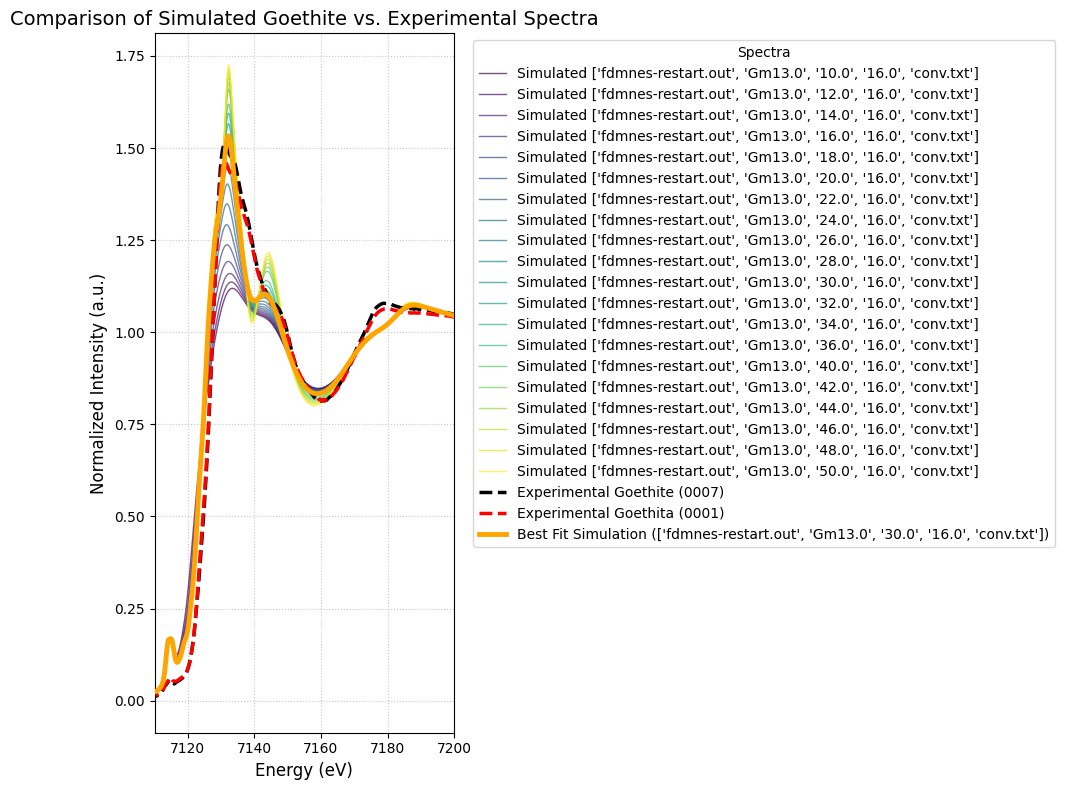

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './Goethite/relaxed/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm13*16.0_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # print("Warning: No overlapping energy range for RMSE calculation.")
        return float('inf') # Return a very large value if no overlap

    # Create a common energy grid for interpolation
    common_energy_grid = np.linspace(min_energy, max_energy, 500) # 500 points for good resolution

    # Interpolate both spectra onto the common energy grid
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
experimental_data = {}
print("Loading and normalizing experimental files...")
for i, file_path in enumerate(exp_files):
    try:
        data = pd.read_csv(file_path, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        # This is a heuristic; more robust would be to know your file format or use skiprows if fixed
        if len(data) > 0 and isinstance(data.iloc[0, 0], str) and not data.iloc[0, 0].replace('.', '', 1).isdigit():
             data = pd.read_csv(file_path, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization as for simulated data
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file_path} (no data >= 7160 eV), skipping.")
            continue
        
        experimental_data[exp_labels[i]] = {'Energy': data['Energy'].values, 'Intensity': data['Intensity'].values}
        print(f"  - Loaded {file_path}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data:
    print("No experimental data loaded. Cannot proceed with RMSE calculation.")
    exit() # Exit if no experimental data is available

# --- Initialize for Best Fit ---
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift  # Apply the shift to the energy values
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # print(f"Could not normalize {file} (no data >= 7160 eV), skipping for RMSE.")
            continue # Skip this file if normalization fails

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for each experimental spectrum
        current_total_rmse = 0
        for label, exp_data in experimental_data.items():
            rmse = calculate_rmse(sim_energy, sim_intensity, exp_data['Energy'], exp_data['Intensity'])
            if rmse == float('inf'): # If no overlap, this simulation is bad for this exp data
                current_total_rmse = float('inf')
                break # No need to check other experimental data for this sim file
            current_total_rmse += rmse
        
        # Update best fit if current simulation is better
        if current_total_rmse < best_total_rmse:
            best_total_rmse = current_total_rmse
            best_simulated_file = file
            # Store the data for the best simulation directly
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with RMSE: {current_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE: {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation.")

# --- Plotting ---

plt.figure(figsize=(12, 8))

# Plot all simulated files (optional, can be removed to only plot best fit)
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract just the Gm part for the label
        label_parts = label_full.split('_')
        label = label_parts #[1] if len(label_parts) > 1 else label_full # Get 'GmXX' part

        # Load and normalize data again (if not already stored) for plotting
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting if normalization failed

        # Plot all simulations with a smaller linewidth
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label}', color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files
print("Plotting experimental files...")
for label, exp_data in experimental_data.items():
    plt.plot(exp_data['Energy'], exp_data['Intensity'],
             label=label,
             color=exp_colors[exp_labels.index(label)], # Get color based on original label list
             linestyle='--',
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts #[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7200)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Loading and normalizing experimental files...
  - Loaded ./Goethite_0007.dat
  - Loaded ./Gohetita_FeOOH_0001.dat

Processing simulated files and calculating RMSE...

Optimization Complete.
Best simulated file: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt
Lowest total RMSE: 0.1337

Plotting all simulated files...
Plotting experimental files...
Plotting best fit: ['fdmnes-restart.out', 'Gm13.0', '30.0', '18.0', 'conv.txt']


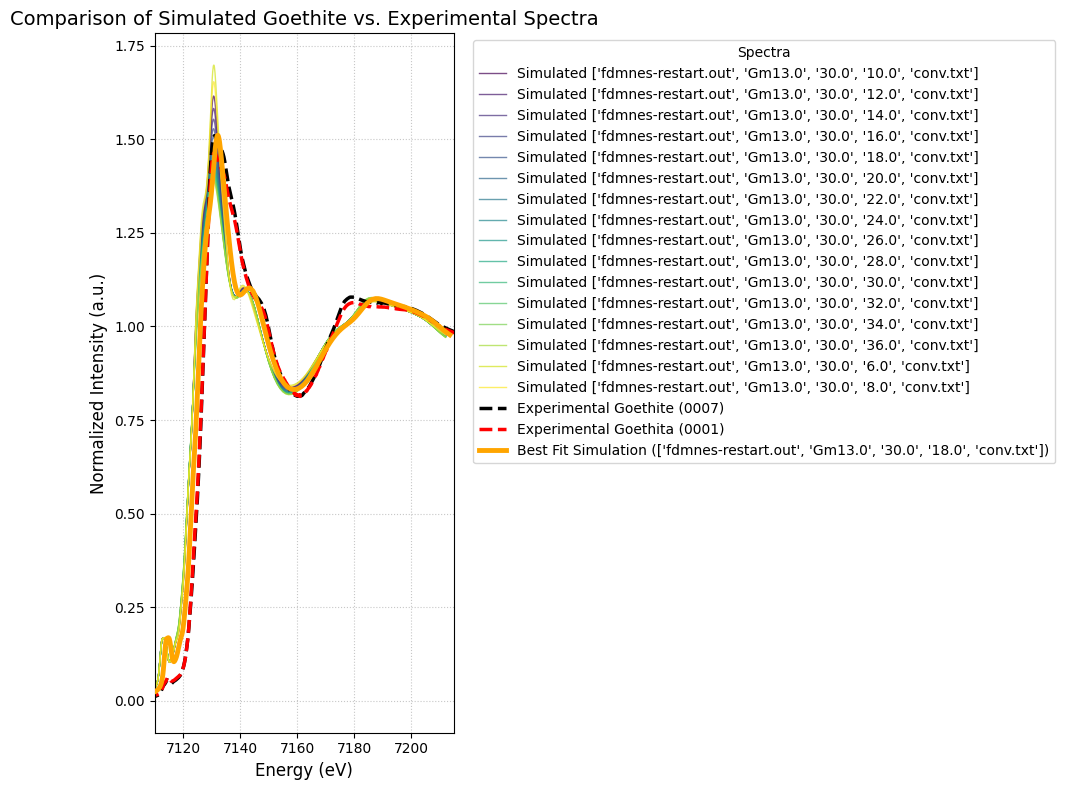

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './Goethite/relaxed/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm13.0_30*_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # print("Warning: No overlapping energy range for RMSE calculation.")
        return float('inf') # Return a very large value if no overlap

    # Create a common energy grid for interpolation
    common_energy_grid = np.linspace(min_energy, max_energy, 500) # 500 points for good resolution

    # Interpolate both spectra onto the common energy grid
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
experimental_data = {}
print("Loading and normalizing experimental files...")
for i, file_path in enumerate(exp_files):
    try:
        data = pd.read_csv(file_path, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        # This is a heuristic; more robust would be to know your file format or use skiprows if fixed
        if len(data) > 0 and isinstance(data.iloc[0, 0], str) and not data.iloc[0, 0].replace('.', '', 1).isdigit():
             data = pd.read_csv(file_path, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization as for simulated data
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file_path} (no data >= 7160 eV), skipping.")
            continue
        
        experimental_data[exp_labels[i]] = {'Energy': data['Energy'].values, 'Intensity': data['Intensity'].values}
        print(f"  - Loaded {file_path}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data:
    print("No experimental data loaded. Cannot proceed with RMSE calculation.")
    exit() # Exit if no experimental data is available

# --- Initialize for Best Fit ---
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # print(f"Could not normalize {file} (no data >= 7160 eV), skipping for RMSE.")
            continue # Skip this file if normalization fails

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for each experimental spectrum
        current_total_rmse = 0
        for label, exp_data in experimental_data.items():
            rmse = calculate_rmse(sim_energy, sim_intensity, exp_data['Energy'], exp_data['Intensity'])
            if rmse == float('inf'): # If no overlap, this simulation is bad for this exp data
                current_total_rmse = float('inf')
                break # No need to check other experimental data for this sim file
            current_total_rmse += rmse
        
        # Update best fit if current simulation is better
        if current_total_rmse < best_total_rmse:
            best_total_rmse = current_total_rmse
            best_simulated_file = file
            # Store the data for the best simulation directly
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with RMSE: {current_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE: {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation.")

# --- Plotting ---

plt.figure(figsize=(12, 8))

# Plot all simulated files (optional, can be removed to only plot best fit)
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract just the Gm part for the label
        label_parts = label_full.split('_')
        label = label_parts #[1] if len(label_parts) > 1 else label_full # Get 'GmXX' part

        # Load and normalize data again (if not already stored) for plotting
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting if normalization failed

        # Plot all simulations with a smaller linewidth
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label}', color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files
print("Plotting experimental files...")
for label, exp_data in experimental_data.items():
    plt.plot(exp_data['Energy'], exp_data['Intensity'],
             label=label,
             color=exp_colors[exp_labels.index(label)], # Get color based on original label list
             linestyle='--',
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts #[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7215)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

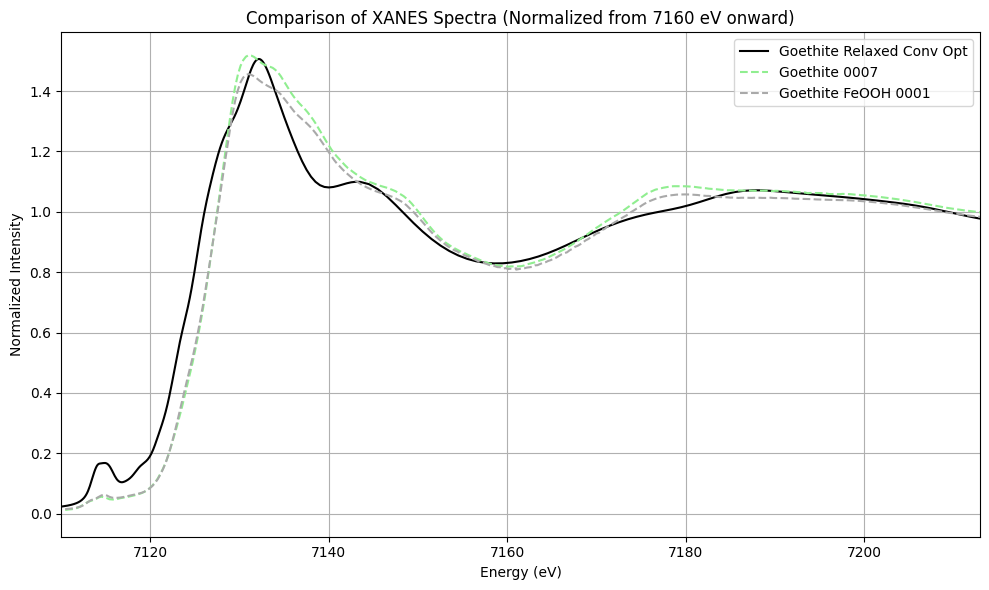

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Simulated Files ---
simulated_files = [
    './Goethite/relaxed/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt'
]

simulated_labels = ['Goethite Relaxed Conv Opt', 'New-Goethite Relaxed', 'Goethite Cif', 'Goethite Relaxed']
simulated_colors = ['black', 'gray', 'blue', 'lightblue']

# --- Experimental Files ---
#padrao_file = './Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
goe1 = 'Goethite_0007.dat'
goe2 = 'Gohetita_FeOOH_0001.dat'

shift = 1.5

plt.figure(figsize=(10, 6))

# Plot simulated files
for i, file in enumerate(simulated_files):
    try:
        # Use a raw string for the separator
        data = pd.read_csv(file, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        # Normalize with average intensity for Energy >= 7160
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        plt.plot(data['Energy']+shift, data['Intensity'], label=simulated_labels[i], color=simulated_colors[i])
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Plot "Padrão 1" (average of columns 2, 3, 4)
try:
    # Use a raw string for the separator
    #df_padrao = pd.read_csv(padrao_file, sep=r'\s+', header=None, skiprows=3)
    #df_padrao['Avg'] = df_padrao[[1, 2, 3]].mean(axis=1)
    #plt.plot(df_padrao[0], df_padrao['Avg'], label='Padrão 1', color='green', linewidth=2, linestyle='-')
    df_goe1 = pd.read_csv(goe1, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    df_goe2 = pd.read_csv(goe2, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    plt.plot(df_goe1['Energy'], df_goe1['Intensity'], label='Goethite 0007', color='lightgreen', linestyle='--')
    plt.plot(df_goe2['Energy'], df_goe2['Intensity'], label='Goethite FeOOH 0001', color='darkgray', linestyle='--')
except Exception as e:
    print(f"Error processing padrão file: {e}")

# Plot average of 25 columns from experimental multi-spectra file
try:
    # Use a raw string for the separator
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)
    #plt.plot(df_multi[0], df_multi['Avg'], label='Exp1 (avg of 25)', color='navy', linestyle='--', linewidth=2)
except Exception as e:
    print(f"Error processing experimental file: {e}")

# Plot formatting
plt.xlabel("Energy (eV)")
plt.ylabel("Normalized Intensity")
plt.xlim(7110, 7213)
plt.title("Comparison of XANES Spectra (Normalized from 7160 eV onward)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Loading and normalizing experimental files...
  - Loaded ./Goethite_0007.dat
  - Loaded ./Gohetita_FeOOH_0001.dat

Processing simulated files and calculating RMSE...

Optimization Complete.
Best simulated file: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt
Lowest total RMSE: 0.2191

Plotting all simulated files...
Plotting experimental files...
Plotting best fit: ['fdmnes-restart.out', 'Gm13.0', '30.0', '18.0', 'conv.txt']


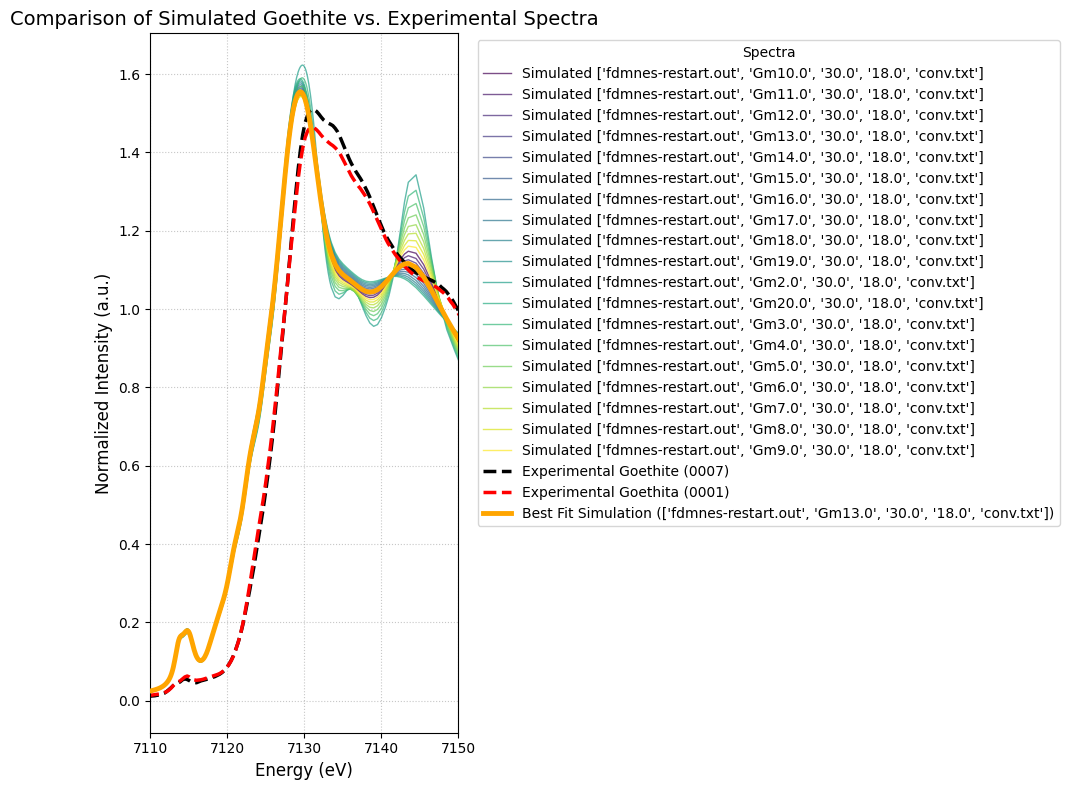

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './E-FeOOH/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm*_30.0_18.0_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # print("Warning: No overlapping energy range for RMSE calculation.")
        return float('inf') # Return a very large value if no overlap

    # Create a common energy grid for interpolation
    common_energy_grid = np.linspace(min_energy, max_energy, 500) # 500 points for good resolution

    # Interpolate both spectra onto the common energy grid
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
experimental_data = {}
print("Loading and normalizing experimental files...")
for i, file_path in enumerate(exp_files):
    try:
        data = pd.read_csv(file_path, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        # This is a heuristic; more robust would be to know your file format or use skiprows if fixed
        if len(data) > 0 and isinstance(data.iloc[0, 0], str) and not data.iloc[0, 0].replace('.', '', 1).isdigit():
             data = pd.read_csv(file_path, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization as for simulated data
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file_path} (no data >= 7160 eV), skipping.")
            continue
        
        experimental_data[exp_labels[i]] = {'Energy': data['Energy'].values, 'Intensity': data['Intensity'].values}
        print(f"  - Loaded {file_path}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data:
    print("No experimental data loaded. Cannot proceed with RMSE calculation.")
    exit() # Exit if no experimental data is available

# --- Initialize for Best Fit ---
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # print(f"Could not normalize {file} (no data >= 7160 eV), skipping for RMSE.")
            continue # Skip this file if normalization fails

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for each experimental spectrum
        current_total_rmse = 0
        for label, exp_data in experimental_data.items():
            rmse = calculate_rmse(sim_energy, sim_intensity, exp_data['Energy'], exp_data['Intensity'])
            if rmse == float('inf'): # If no overlap, this simulation is bad for this exp data
                current_total_rmse = float('inf')
                break # No need to check other experimental data for this sim file
            current_total_rmse += rmse
        
        # Update best fit if current simulation is better
        if current_total_rmse < best_total_rmse:
            best_total_rmse = current_total_rmse
            best_simulated_file = file
            # Store the data for the best simulation directly
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with RMSE: {current_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE: {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation.")

# --- Plotting ---

plt.figure(figsize=(12, 8))

# Plot all simulated files (optional, can be removed to only plot best fit)
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract just the Gm part for the label
        label_parts = label_full.split('_')
        label = label_parts #[1] if len(label_parts) > 1 else label_full # Get 'GmXX' part

        # Load and normalize data again (if not already stored) for plotting
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting if normalization failed

        # Plot all simulations with a smaller linewidth
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label}', color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files
print("Plotting experimental files...")
for label, exp_data in experimental_data.items():
    plt.plot(exp_data['Energy'], exp_data['Intensity'],
             label=label,
             color=exp_colors[exp_labels.index(label)], # Get color based on original label list
             linestyle='--',
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts #[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7150)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Loading and normalizing experimental files...
  - Loaded ./Goethite_0007.dat
  - Loaded ./Gohetita_FeOOH_0001.dat

Processing simulated files and calculating RMSE...

Optimization Complete.
Best simulated file: fdmnes-restart.out_Gm13.0_26.0_18.0_conv.txt
Lowest total RMSE: 0.2176

Plotting all simulated files...
Plotting experimental files...
Plotting best fit: ['fdmnes-restart.out', 'Gm13.0', '26.0', '18.0', 'conv.txt']


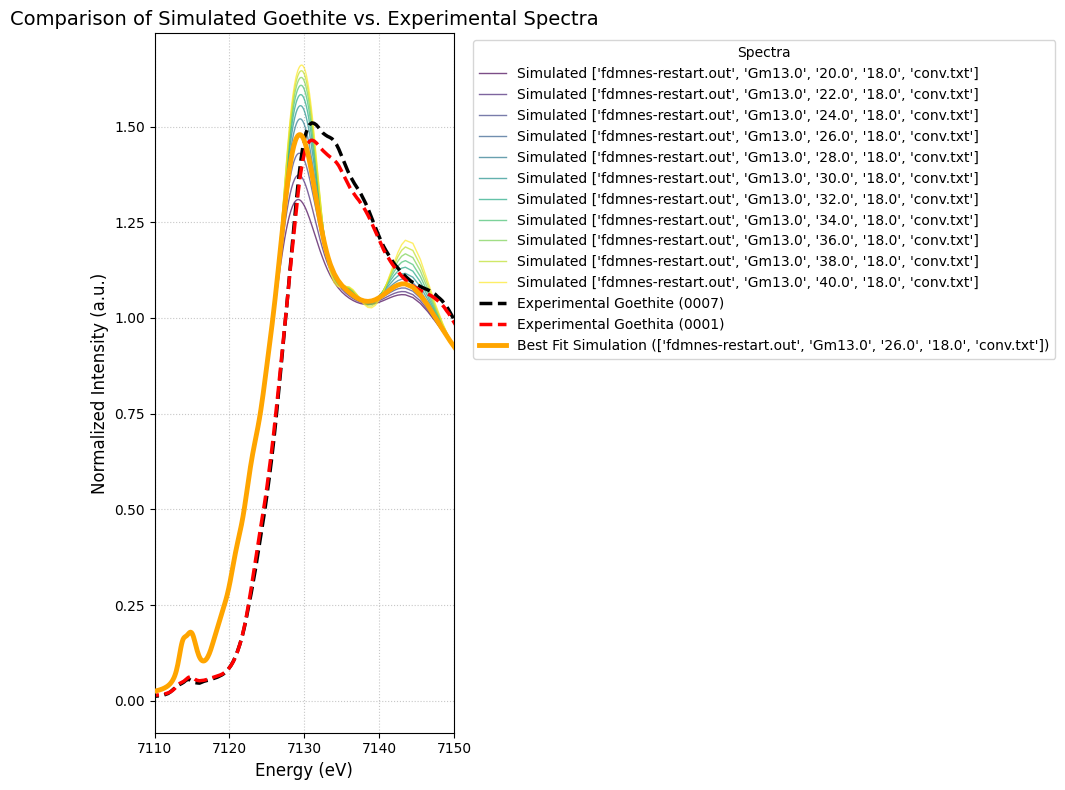

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './E-FeOOH/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm13.0*_18.0_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # print("Warning: No overlapping energy range for RMSE calculation.")
        return float('inf') # Return a very large value if no overlap

    # Create a common energy grid for interpolation
    common_energy_grid = np.linspace(min_energy, max_energy, 500) # 500 points for good resolution

    # Interpolate both spectra onto the common energy grid
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
experimental_data = {}
print("Loading and normalizing experimental files...")
for i, file_path in enumerate(exp_files):
    try:
        data = pd.read_csv(file_path, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        # This is a heuristic; more robust would be to know your file format or use skiprows if fixed
        if len(data) > 0 and isinstance(data.iloc[0, 0], str) and not data.iloc[0, 0].replace('.', '', 1).isdigit():
             data = pd.read_csv(file_path, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization as for simulated data
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file_path} (no data >= 7160 eV), skipping.")
            continue
        
        experimental_data[exp_labels[i]] = {'Energy': data['Energy'].values, 'Intensity': data['Intensity'].values}
        print(f"  - Loaded {file_path}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data:
    print("No experimental data loaded. Cannot proceed with RMSE calculation.")
    exit() # Exit if no experimental data is available

# --- Initialize for Best Fit ---
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # print(f"Could not normalize {file} (no data >= 7160 eV), skipping for RMSE.")
            continue # Skip this file if normalization fails

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for each experimental spectrum
        current_total_rmse = 0
        for label, exp_data in experimental_data.items():
            rmse = calculate_rmse(sim_energy, sim_intensity, exp_data['Energy'], exp_data['Intensity'])
            if rmse == float('inf'): # If no overlap, this simulation is bad for this exp data
                current_total_rmse = float('inf')
                break # No need to check other experimental data for this sim file
            current_total_rmse += rmse
        
        # Update best fit if current simulation is better
        if current_total_rmse < best_total_rmse:
            best_total_rmse = current_total_rmse
            best_simulated_file = file
            # Store the data for the best simulation directly
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with RMSE: {current_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE: {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation.")

# --- Plotting ---

plt.figure(figsize=(12, 8))

# Plot all simulated files (optional, can be removed to only plot best fit)
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract just the Gm part for the label
        label_parts = label_full.split('_')
        label = label_parts #[1] if len(label_parts) > 1 else label_full # Get 'GmXX' part

        # Load and normalize data again (if not already stored) for plotting
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting if normalization failed

        # Plot all simulations with a smaller linewidth
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label}', color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files
print("Plotting experimental files...")
for label, exp_data in experimental_data.items():
    plt.plot(exp_data['Energy'], exp_data['Intensity'],
             label=label,
             color=exp_colors[exp_labels.index(label)], # Get color based on original label list
             linestyle='--',
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts #[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7150)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Loading and normalizing experimental files...
  - Loaded ./Goethite_0007.dat
  - Loaded ./Gohetita_FeOOH_0001.dat

Processing simulated files and calculating RMSE...

Optimization Complete.
Best simulated file: fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt
Lowest total RMSE: 0.2170

Plotting all simulated files...
Plotting experimental files...
Plotting best fit: ['fdmnes-restart.out', 'Gm13.0', '26.0', '24.0', 'conv.txt']


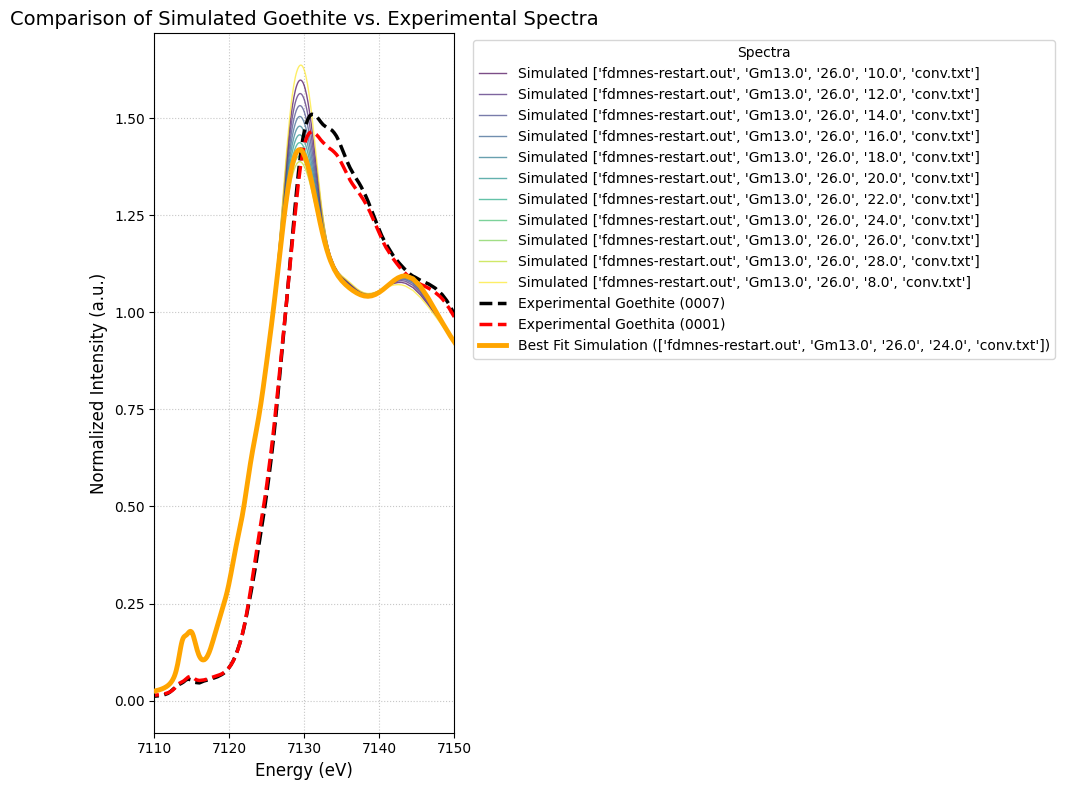

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './E-FeOOH/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
exp_files = [
    './Goethite_0007.dat',
    './Gohetita_FeOOH_0001.dat'
]
exp_labels = ['Experimental Goethite (0007)', 'Experimental Goethita (0001)']
exp_colors = ['black', 'red']

shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm13.0_26.0*_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1]
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # print("Warning: No overlapping energy range for RMSE calculation.")
        return float('inf') # Return a very large value if no overlap

    # Create a common energy grid for interpolation
    common_energy_grid = np.linspace(min_energy, max_energy, 500) # 500 points for good resolution

    # Interpolate both spectra onto the common energy grid
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
experimental_data = {}
print("Loading and normalizing experimental files...")
for i, file_path in enumerate(exp_files):
    try:
        data = pd.read_csv(file_path, sep=r'\s+', header=None)
        # Check if the first row looks like a header (contains non-numeric data)
        # This is a heuristic; more robust would be to know your file format or use skiprows if fixed
        if len(data) > 0 and isinstance(data.iloc[0, 0], str) and not data.iloc[0, 0].replace('.', '', 1).isdigit():
             data = pd.read_csv(file_path, sep=r'\s+', header=0)
        
        data.columns = ['Energy', 'Intensity'] # Rename columns for consistency
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Apply the same normalization as for simulated data
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize {file_path} (no data >= 7160 eV), skipping.")
            continue
        
        experimental_data[exp_labels[i]] = {'Energy': data['Energy'].values, 'Intensity': data['Intensity'].values}
        print(f"  - Loaded {file_path}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data:
    print("No experimental data loaded. Cannot proceed with RMSE calculation.")
    exit() # Exit if no experimental data is available

# --- Initialize for Best Fit ---
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # print(f"Could not normalize {file} (no data >= 7160 eV), skipping for RMSE.")
            continue # Skip this file if normalization fails

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for each experimental spectrum
        current_total_rmse = 0
        for label, exp_data in experimental_data.items():
            rmse = calculate_rmse(sim_energy, sim_intensity, exp_data['Energy'], exp_data['Intensity'])
            if rmse == float('inf'): # If no overlap, this simulation is bad for this exp data
                current_total_rmse = float('inf')
                break # No need to check other experimental data for this sim file
            current_total_rmse += rmse
        
        # Update best fit if current simulation is better
        if current_total_rmse < best_total_rmse:
            best_total_rmse = current_total_rmse
            best_simulated_file = file
            # Store the data for the best simulation directly
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with RMSE: {current_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE: {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation.")

# --- Plotting ---

plt.figure(figsize=(12, 8))

# Plot all simulated files (optional, can be removed to only plot best fit)
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract just the Gm part for the label
        label_parts = label_full.split('_')
        label = label_parts #[1] if len(label_parts) > 1 else label_full # Get 'GmXX' part

        # Load and normalize data again (if not already stored) for plotting
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting if normalization failed

        # Plot all simulations with a smaller linewidth
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label}', color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files
print("Plotting experimental files...")
for label, exp_data in experimental_data.items():
    plt.plot(exp_data['Energy'], exp_data['Intensity'],
             label=label,
             color=exp_colors[exp_labels.index(label)], # Get color based on original label list
             linestyle='--',
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts #[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Goethite vs. Experimental Spectra", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(7110, 7150)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

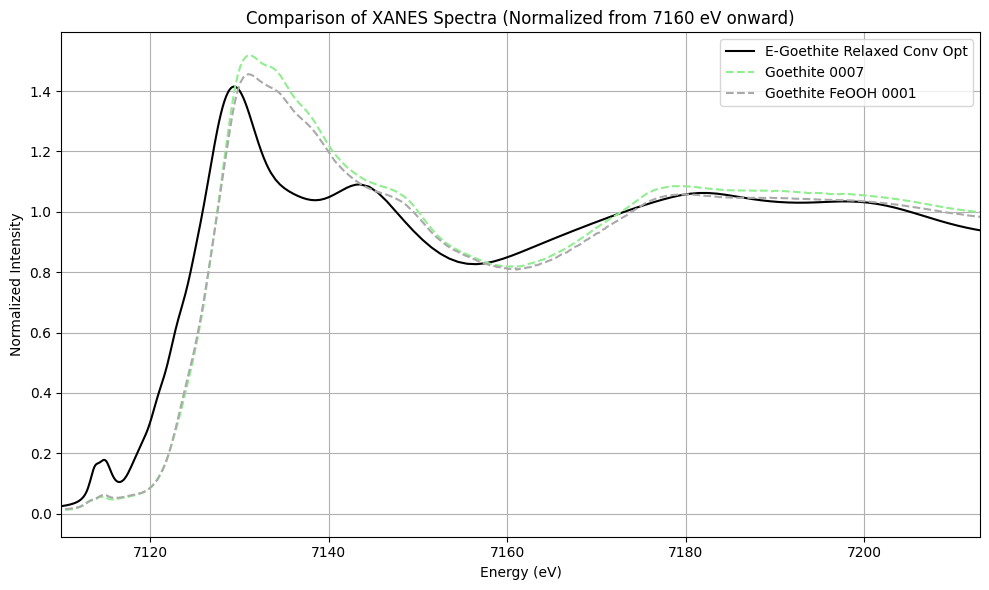

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Simulated Files ---
simulated_files = [
    './E-FeOOH/convs/fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt'
]

simulated_labels = ['E-Goethite Relaxed Conv Opt', 'New-Goethite Relaxed', 'Goethite Cif', 'Goethite Relaxed']
simulated_colors = ['black', 'gray', 'blue', 'lightblue']

# --- Experimental Files ---
#padrao_file = './Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
goe1 = 'Goethite_0007.dat'
goe2 = 'Gohetita_FeOOH_0001.dat'

shift = 1.5

plt.figure(figsize=(10, 6))

# Plot simulated files
for i, file in enumerate(simulated_files):
    try:
        # Use a raw string for the separator
        data = pd.read_csv(file, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        # Normalize with average intensity for Energy >= 7160
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        plt.plot(data['Energy']+shift, data['Intensity'], label=simulated_labels[i], color=simulated_colors[i])
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Plot "Padrão 1" (average of columns 2, 3, 4)
try:
    # Use a raw string for the separator
    #df_padrao = pd.read_csv(padrao_file, sep=r'\s+', header=None, skiprows=3)
    #df_padrao['Avg'] = df_padrao[[1, 2, 3]].mean(axis=1)
    #plt.plot(df_padrao[0], df_padrao['Avg'], label='Padrão 1', color='green', linewidth=2, linestyle='-')
    df_goe1 = pd.read_csv(goe1, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    df_goe2 = pd.read_csv(goe2, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    plt.plot(df_goe1['Energy'], df_goe1['Intensity'], label='Goethite 0007', color='lightgreen', linestyle='--')
    plt.plot(df_goe2['Energy'], df_goe2['Intensity'], label='Goethite FeOOH 0001', color='darkgray', linestyle='--')
except Exception as e:
    print(f"Error processing padrão file: {e}")

# Plot average of 25 columns from experimental multi-spectra file
try:
    # Use a raw string for the separator
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)
    #plt.plot(df_multi[0], df_multi['Avg'], label='Exp1 (avg of 25)', color='navy', linestyle='--', linewidth=2)
except Exception as e:
    print(f"Error processing experimental file: {e}")

# Plot formatting
plt.xlabel("Energy (eV)")
plt.ylabel("Normalized Intensity")
plt.xlim(7110, 7213)
plt.title("Comparison of XANES Spectra (Normalized from 7160 eV onward)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

['./Hematite_Fe2O3/convs/fdmnes-restart.out_Gm10.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm11.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm12.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm13.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm15.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm16.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm17.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm18.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm19.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm2.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm20.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm3.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm4.0_26.0_28.0_conv.txt', './Hemat

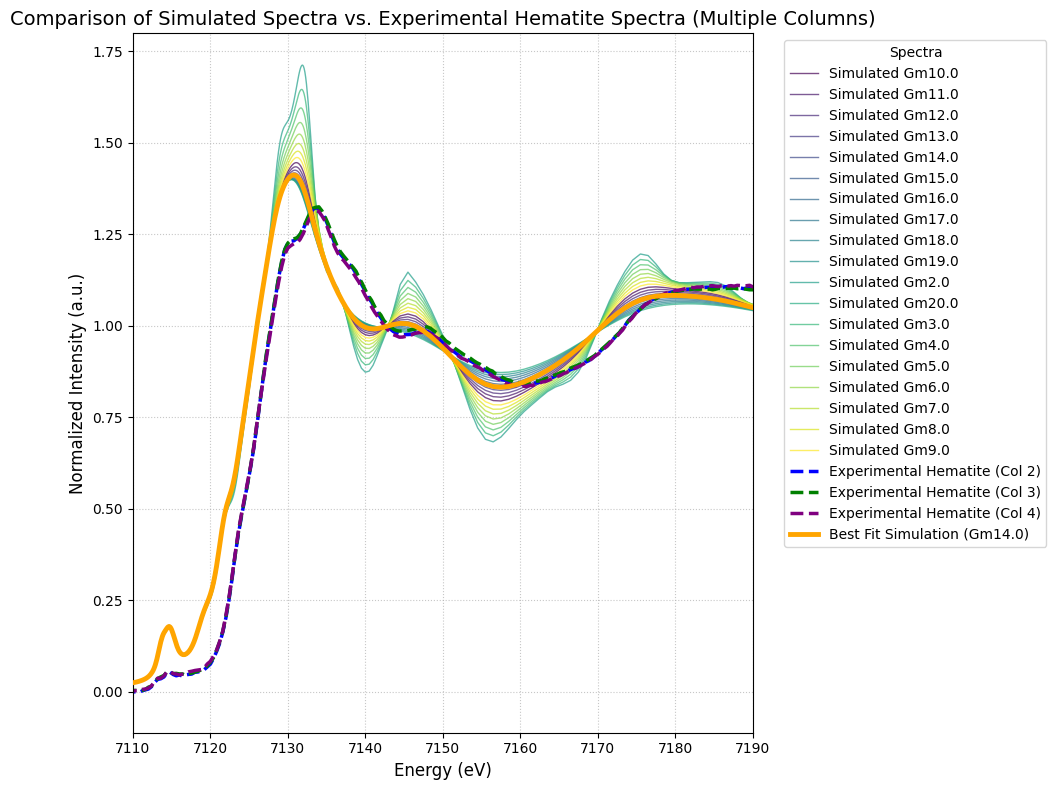

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './Hematite_Fe2O3/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
# The user specifically requested 'Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
exp_files = [
    'Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
]
# Base label for the experimental file, labels for each column will be generated dynamically
exp_base_label = 'Experimental Hematite'
# Define colors for each of the experimental intensity columns (col 2, 3, 4 based on 1-indexing)
exp_colors_map = {
    'Intensity1': 'blue',   # Corresponds to column 2
    'Intensity2': 'green',  # Corresponds to column 3
    'Intensity3': 'purple'  # Corresponds to column 4
}


shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm*_26.0_28.0_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))
print(simulated_files)

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    """
    Extracts the 'Gm' number from the filename for sorting.
    Example filename: fdmnes-restart.out_Gm123_26.0_28.0_conv.txt -> returns 123
    """
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1] # Assumes 'GmXXX' is the second part
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        # Return a high number to place unparseable files at the end
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value. Returns float('inf') if no overlapping energy range.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # No overlapping energy range, cannot calculate meaningful RMSE
        return float('inf')

    # Create a common energy grid for interpolation with sufficient resolution
    common_energy_grid = np.linspace(min_energy, max_energy, 500)

    # Interpolate both spectra onto the common energy grid
    # 'kind='linear'' for linear interpolation, 'fill_value="extrapolate"' to handle points outside range
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
# This list will store dictionaries, each representing one experimental spectrum
# (Energy vs. Intensity from a specific column).
experimental_data_all_columns = []
print("Loading and normalizing experimental files...")
for file_path in exp_files:
    try:
        # Read the file assuming space-separated values and no specific header for the first few rows.
        # Columns 1, 2, 3, and 4 (1-indexed) are requested.
        # This translates to 0-indexed columns: 0 (Energy), 1 (Intensity1), 2 (Intensity2), 3 (Intensity3).
        data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=3) # Start with original skiprows=3

        # Basic check: ensure we have at least 4 columns as expected (Energy + 3 Intensities)
        if data.shape[1] < 4:
            # If not enough columns, try re-reading with fewer skiprows or without header
            data = pd.read_csv(file_path, sep=r'\s+', header=None)
            if data.shape[1] < 4:
                raise ValueError(f"Not enough columns (expected at least 4) in {file_path}. Please check file format.")

        # Assign column names based on the request
        # The remaining columns are given generic names if they exist
        column_names = ['Energy', 'Intensity1', 'Intensity2', 'Intensity3'] + \
                       [f'Col{c}' for c in range(4, data.shape[1])]
        data.columns = column_names[:data.shape[1]] # Ensure we don't assign more names than columns

        # Convert relevant columns to numeric, coercing errors to NaN, then drop rows with NaNs
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        intensity_columns_to_process = ['Intensity1', 'Intensity2', 'Intensity3']
        for col in intensity_columns_to_process:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        # Drop rows where critical columns (Energy or any of the main intensities) are NaN
        data.dropna(subset=['Energy'] + intensity_columns_to_process, inplace=True)

        # Process each of the specified intensity columns
        for j, intensity_col_name in enumerate(intensity_columns_to_process):
            # Create a copy to avoid SettingWithCopyWarning
            current_intensity_series = data[intensity_col_name].copy()

            # Apply normalization: divide by the mean intensity in a specific energy range
            # The range >= 7160 eV is carried over from the original script
            mean_intensity = current_intensity_series[data['Energy'] >= 7160].mean()
            if pd.notna(mean_intensity) and mean_intensity != 0:
                current_intensity_series /= mean_intensity
            else:
                print(f"Could not normalize {file_path} - {intensity_col_name} (no data >= 7160 eV or zero mean), skipping.")
                continue # Skip this specific intensity column if normalization fails

            # Generate a label for plotting (e.g., 'Experimental Hematite (Col 2)')
            label = f'{exp_base_label} (Col {j+2})' # +2 because 'Intensity1' is col 2, etc.
            # Get the color from the map, default to black if not found
            color = exp_colors_map.get(intensity_col_name, 'black')

            # Store the processed experimental spectrum data
            experimental_data_all_columns.append({
                'label': label,
                'Energy': data['Energy'].values,
                'Intensity': current_intensity_series.values,
                'color': color # Store color along with the data for plotting
            })
            print(f"  - Loaded and normalized {file_path} - {label}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data_all_columns:
    print("No experimental data loaded or processed successfully. Cannot proceed with RMSE calculation or plotting.")
    exit() # Exit if no experimental data is available to compare against

# --- Initialize for Best Fit Search ---
# best_total_rmse will store the sum of RMSEs for a simulated file against all valid experimental columns.
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity'] # Assuming simulated files always have these two columns
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift # Apply energy shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalization for simulated data (same logic as experimental data)
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # Skip this simulated file if normalization fails
            continue

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for this simulated file against each experimental spectrum (each column)
        current_sim_file_total_rmse = 0 # Sum of RMSEs for the current simulated file
        valid_comparisons_count = 0 # Count how many experimental columns this simulation could be compared with

        for exp_spec_data in experimental_data_all_columns:
            rmse = calculate_rmse(
                sim_energy, sim_intensity,
                exp_spec_data['Energy'], exp_spec_data['Intensity']
            )
            if rmse == float('inf'):
                # If a simulated file cannot be compared (no overlap) with even one experimental column,
                # it's considered not suitable for a "total best fit".
                current_sim_file_total_rmse = float('inf')
                break # Exit the inner loop, move to next simulated file
            else:
                current_sim_file_total_rmse += rmse
                valid_comparisons_count += 1
        
        # Update best fit if all experimental columns were successfully compared
        # and the current total RMSE is lower than the previous best.
        if valid_comparisons_count == len(experimental_data_all_columns) and \
           current_sim_file_total_rmse < best_total_rmse:
            best_total_rmse = current_sim_file_total_rmse
            best_simulated_file = file
            # Store the energy and intensity data for the best simulated spectrum
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with total RMSE: {current_sim_file_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE (summed over all experimental columns): {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation against all experimental columns.")

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Set figure size for better readability

# Plot all simulated files with a spectrum of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract the 'GmXX' part for a concise label in the plot legend
        label_parts = label_full.split('_')
        label_for_plot = label_parts[1] if len(label_parts) > 1 else label_full

        # Reload and normalize data for plotting if not already stored from RMSE processing.
        # This ensures fresh data for plotting, independent of RMSE calculation side effects.
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting this file if normalization failed

        # Plot all simulations with a smaller linewidth and slight transparency
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label_for_plot}',
                 color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files (now iterating through the list of processed columns)
print("Plotting experimental files (multiple columns)...")
for exp_spec_data in experimental_data_all_columns:
    plt.plot(exp_spec_data['Energy'], exp_spec_data['Intensity'],
             label=exp_spec_data['label'],
             color=exp_spec_data['color'],
             linestyle='--', # Dashed line for experimental data
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker, distinct line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found matching all experimental columns.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Spectra vs. Experimental Hematite Spectra (Multiple Columns)", fontsize=14)
# Place legend outside the plot area to avoid overlap with data
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits for better focus
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend on the right
plt.show() # Display the plot


['./Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_10.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_12.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_14.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_16.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_18.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_22.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_24.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_26.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_28.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_30.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_32.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_34.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_36.0_28.0_conv.txt', './He

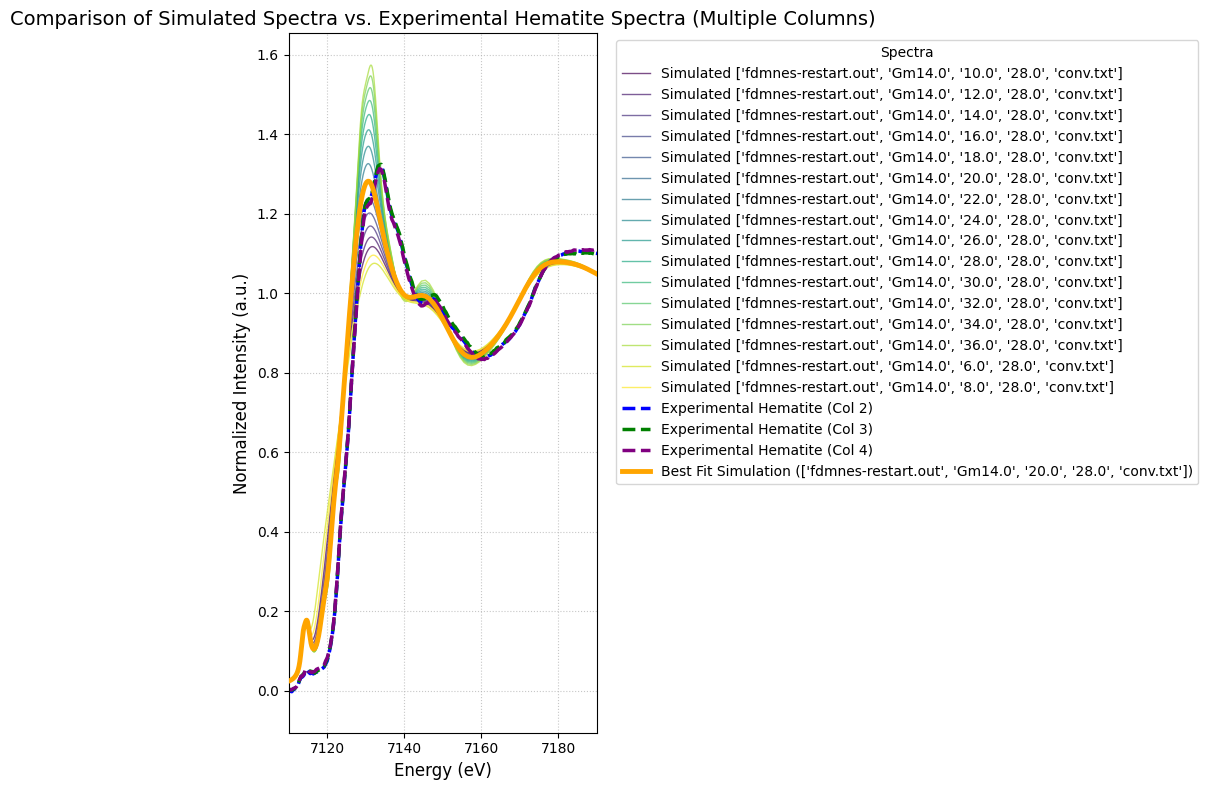

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.interpolate import interp1d

# --- Configuration ---

# Directory containing the simulated goethite files
# simulated_dir = './New-Goethite/convs/'
simulated_dir = './Hematite_Fe2O3/convs/'

# List of the experimental files. Assume they are in the current directory or provide a full path.
# The user specifically requested 'Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
exp_files = [
    'Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
]
# Base label for the experimental file, labels for each column will be generated dynamically
exp_base_label = 'Experimental Hematite'
# Define colors for each of the experimental intensity columns (col 2, 3, 4 based on 1-indexing)
exp_colors_map = {
    'Intensity1': 'blue',   # Corresponds to column 2
    'Intensity2': 'green',  # Corresponds to column 3
    'Intensity3': 'purple'  # Corresponds to column 4
}


shift = 1.5  # Shift for simulated files in the plot to avoid overlap

# --- Find and Sort Simulated Files ---

# Find all files matching the pattern
simulated_pattern = os.path.join(simulated_dir, 'fdmnes-restart.out_Gm14.0_*_28.0_conv.txt')
simulated_files = sorted(glob.glob(simulated_pattern))
print(simulated_files)

# Sort the files numerically based on the 'Gm' number for a logical plot order
def get_gm_number(filepath):
    """
    Extracts the 'Gm' number from the filename for sorting.
    Example filename: fdmnes-restart.out_Gm123_26.0_28.0_conv.txt -> returns 123
    """
    try:
        filename = os.path.basename(filepath)
        gm_part = filename.split('_')[1] # Assumes 'GmXXX' is the second part
        return int(gm_part.replace('Gm', ''))
    except (IndexError, ValueError):
        # Return a high number to place unparseable files at the end
        return 999

simulated_files.sort(key=get_gm_number)

# --- RMSE Calculation Function ---
def calculate_rmse(sim_energy, sim_spectrum, exp_energy, exp_spectrum):
    """
    Calculates the Root Mean Squared Error (RMSE) between a simulated
    and experimental spectrum after interpolating onto a common energy grid.

    Args:
        sim_energy (np.array): Energy points of the simulated spectrum.
        sim_spectrum (np.array): Absorption values of the simulated spectrum.
        exp_energy (np.array): Energy points of the experimental spectrum.
        exp_spectrum (np.array): Absorption values of the experimental spectrum.

    Returns:
        float: The RMSE value. Returns float('inf') if no overlapping energy range.
    """
    # Define a common energy range for comparison
    min_energy = max(np.min(sim_energy), np.min(exp_energy))
    max_energy = min(np.max(sim_energy), np.max(exp_energy))

    if min_energy >= max_energy:
        # No overlapping energy range, cannot calculate meaningful RMSE
        return float('inf')

    # Create a common energy grid for interpolation with sufficient resolution
    common_energy_grid = np.linspace(min_energy, max_energy, 500)

    # Interpolate both spectra onto the common energy grid
    # 'kind='linear'' for linear interpolation, 'fill_value="extrapolate"' to handle points outside range
    interp_sim = interp1d(sim_energy, sim_spectrum, kind='linear', fill_value="extrapolate")
    interp_exp = interp1d(exp_energy, exp_spectrum, kind='linear', fill_value="extrapolate")

    sim_on_grid = interp_sim(common_energy_grid)
    exp_on_grid = interp_exp(common_energy_grid)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(np.mean((sim_on_grid - exp_on_grid)**2))
    return rmse

# --- Load and Normalize Experimental Files (once) ---
# This list will store dictionaries, each representing one experimental spectrum
# (Energy vs. Intensity from a specific column).
experimental_data_all_columns = []
print("Loading and normalizing experimental files...")
for file_path in exp_files:
    try:
        # Read the file assuming space-separated values and no specific header for the first few rows.
        # Columns 1, 2, 3, and 4 (1-indexed) are requested.
        # This translates to 0-indexed columns: 0 (Energy), 1 (Intensity1), 2 (Intensity2), 3 (Intensity3).
        data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=3) # Start with original skiprows=3

        # Basic check: ensure we have at least 4 columns as expected (Energy + 3 Intensities)
        if data.shape[1] < 4:
            # If not enough columns, try re-reading with fewer skiprows or without header
            data = pd.read_csv(file_path, sep=r'\s+', header=None)
            if data.shape[1] < 4:
                raise ValueError(f"Not enough columns (expected at least 4) in {file_path}. Please check file format.")

        # Assign column names based on the request
        # The remaining columns are given generic names if they exist
        column_names = ['Energy', 'Intensity1', 'Intensity2', 'Intensity3'] + \
                       [f'Col{c}' for c in range(4, data.shape[1])]
        data.columns = column_names[:data.shape[1]] # Ensure we don't assign more names than columns

        # Convert relevant columns to numeric, coercing errors to NaN, then drop rows with NaNs
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        intensity_columns_to_process = ['Intensity1', 'Intensity2', 'Intensity3']
        for col in intensity_columns_to_process:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        # Drop rows where critical columns (Energy or any of the main intensities) are NaN
        data.dropna(subset=['Energy'] + intensity_columns_to_process, inplace=True)

        # Process each of the specified intensity columns
        for j, intensity_col_name in enumerate(intensity_columns_to_process):
            # Create a copy to avoid SettingWithCopyWarning
            current_intensity_series = data[intensity_col_name].copy()

            # Apply normalization: divide by the mean intensity in a specific energy range
            # The range >= 7160 eV is carried over from the original script
            mean_intensity = current_intensity_series[data['Energy'] >= 7160].mean()
            if pd.notna(mean_intensity) and mean_intensity != 0:
                current_intensity_series /= mean_intensity
            else:
                print(f"Could not normalize {file_path} - {intensity_col_name} (no data >= 7160 eV or zero mean), skipping.")
                continue # Skip this specific intensity column if normalization fails

            # Generate a label for plotting (e.g., 'Experimental Hematite (Col 2)')
            label = f'{exp_base_label} (Col {j+2})' # +2 because 'Intensity1' is col 2, etc.
            # Get the color from the map, default to black if not found
            color = exp_colors_map.get(intensity_col_name, 'black')

            # Store the processed experimental spectrum data
            experimental_data_all_columns.append({
                'label': label,
                'Energy': data['Energy'].values,
                'Intensity': current_intensity_series.values,
                'color': color # Store color along with the data for plotting
            })
            print(f"  - Loaded and normalized {file_path} - {label}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data_all_columns:
    print("No experimental data loaded or processed successfully. Cannot proceed with RMSE calculation or plotting.")
    exit() # Exit if no experimental data is available to compare against

# --- Initialize for Best Fit Search ---
# best_total_rmse will store the sum of RMSEs for a simulated file against all valid experimental columns.
best_total_rmse = float('inf')
best_simulated_file = None
best_simulated_data = None # Store energy and intensity of the best spectrum

# --- Process Simulated Files and Calculate RMSE ---
print("\nProcessing simulated files and calculating RMSE...")
for i, file in enumerate(simulated_files):
    try:
        # Load and normalize simulated data
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity'] # Assuming simulated files always have these two columns
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift # Apply energy shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalization for simulated data (same logic as experimental data)
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            # Skip this simulated file if normalization fails
            continue

        sim_energy = data['Energy'].values
        sim_intensity = data['Intensity'].values

        # Calculate RMSE for this simulated file against each experimental spectrum (each column)
        current_sim_file_total_rmse = 0 # Sum of RMSEs for the current simulated file
        valid_comparisons_count = 0 # Count how many experimental columns this simulation could be compared with

        for exp_spec_data in experimental_data_all_columns:
            rmse = calculate_rmse(
                sim_energy, sim_intensity,
                exp_spec_data['Energy'], exp_spec_data['Intensity']
            )
            if rmse == float('inf'):
                # If a simulated file cannot be compared (no overlap) with even one experimental column,
                # it's considered not suitable for a "total best fit".
                current_sim_file_total_rmse = float('inf')
                break # Exit the inner loop, move to next simulated file
            else:
                current_sim_file_total_rmse += rmse
                valid_comparisons_count += 1
        
        # Update best fit if all experimental columns were successfully compared
        # and the current total RMSE is lower than the previous best.
        if valid_comparisons_count == len(experimental_data_all_columns) and \
           current_sim_file_total_rmse < best_total_rmse:
            best_total_rmse = current_sim_file_total_rmse
            best_simulated_file = file
            # Store the energy and intensity data for the best simulated spectrum
            best_simulated_data = {'Energy': sim_energy, 'Intensity': sim_intensity}
            # print(f"  - New best: {os.path.basename(file)} with total RMSE: {current_sim_file_total_rmse:.4f}")

    except Exception as e:
        print(f"Error processing {file} for RMSE: {e}")

print(f"\nOptimization Complete.")
if best_simulated_file:
    print(f"Best simulated file: {os.path.basename(best_simulated_file)}")
    print(f"Lowest total RMSE (summed over all experimental columns): {best_total_rmse:.4f}")
else:
    print("No suitable simulated file found for RMSE calculation against all experimental columns.")

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Set figure size for better readability

# Plot all simulated files with a spectrum of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(simulated_files)))
print("\nPlotting all simulated files...")
for i, file in enumerate(simulated_files):
    try:
        label_full = os.path.basename(file)
        # Extract the 'GmXX' part for a concise label in the plot legend
        label_parts = label_full.split('_')
        label_for_plot = label_parts #[1] if len(label_parts) > 1 else label_full

        # Reload and normalize data for plotting if not already stored from RMSE processing.
        # This ensures fresh data for plotting, independent of RMSE calculation side effects.
        data = pd.read_csv(file, sep=r'\s+', comment='#', header=None, skiprows=1)
        data.columns = ['Energy', 'Intensity']
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce') + shift
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            continue # Skip plotting this file if normalization failed

        # Plot all simulations with a smaller linewidth and slight transparency
        plt.plot(data['Energy'], data['Intensity'], label=f'Simulated {label_for_plot}',
                 color=colors[i], linewidth=1.0, alpha=0.7)

    except Exception as e:
        print(f"Error plotting {file}: {e}")

# Plot experimental files (now iterating through the list of processed columns)
print("Plotting experimental files (multiple columns)...")
for exp_spec_data in experimental_data_all_columns:
    plt.plot(exp_spec_data['Energy'], exp_spec_data['Intensity'],
             label=exp_spec_data['label'],
             color=exp_spec_data['color'],
             linestyle='--', # Dashed line for experimental data
             linewidth=2.5)

# Plot the best-fit simulated spectrum with a thicker, distinct line
if best_simulated_data:
    best_label_full = os.path.basename(best_simulated_file)
    best_label_parts = best_label_full.split('_')
    best_label_gm = best_label_parts #[1] if len(best_label_parts) > 1 else best_label_full

    plt.plot(best_simulated_data['Energy'], best_simulated_data['Intensity'],
             label=f'Best Fit Simulation ({best_label_gm})',
             color='orange', linestyle='-', linewidth=3.5, zorder=5) # Thicker line, brought to front
    print(f"Plotting best fit: {best_label_gm}")
else:
    print("Could not plot best fit as no suitable simulation was found matching all experimental columns.")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of Simulated Spectra vs. Experimental Hematite Spectra (Multiple Columns)", fontsize=14)
# Place legend outside the plot area to avoid overlap with data
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits for better focus
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend on the right
plt.show() # Display the plot


['./Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_10.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_12.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_14.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_16.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_18.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_20.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_22.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_24.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_26.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_28.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_30.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_32.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_34.0_conv.txt', './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt', './He

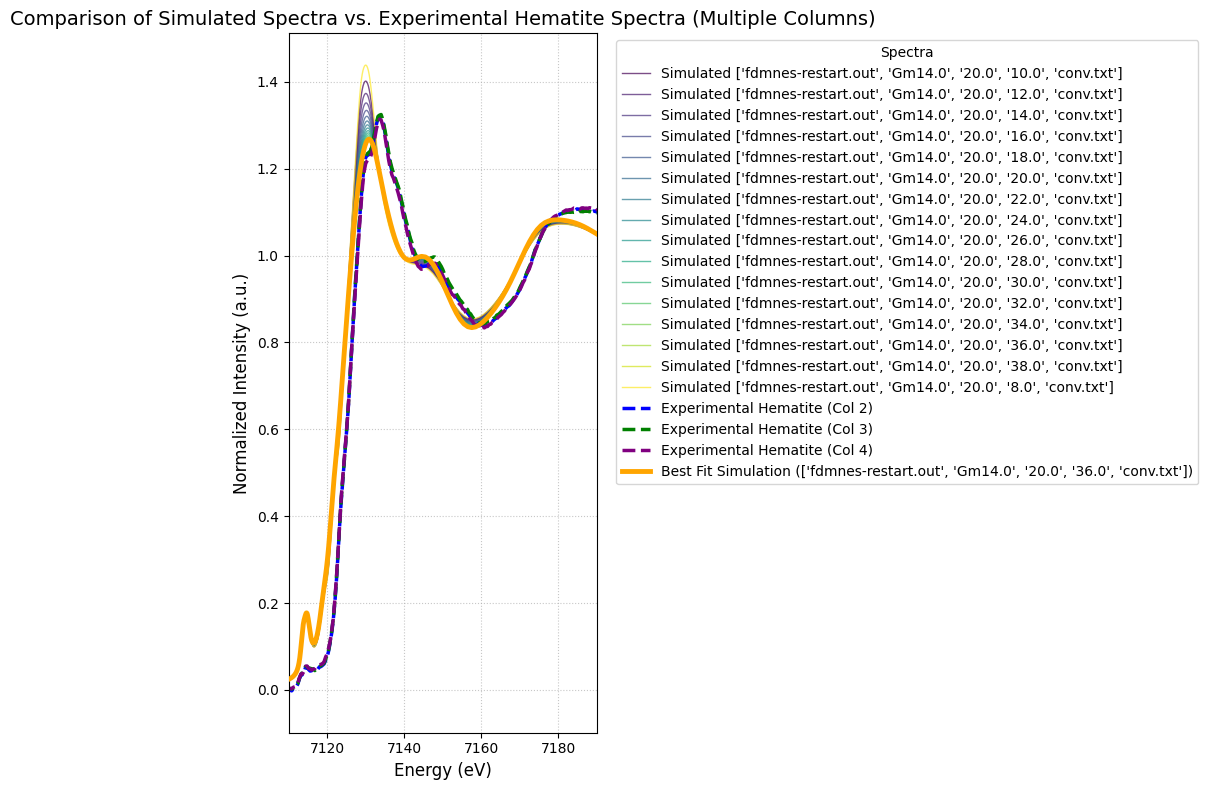

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np # Used for np.min, np.max, np.linspace, np.sqrt, np.mean

# --- Configuration for Simulated Files ---
# Directory containing the simulated files as per the provided snippet
simulated_dir = './E-FeOOH/convs/'

# List of simulated files
simulated_files = [
    os.path.join(simulated_dir, 'fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt')
]

# Labels and colors for the simulated files.
# Note: The provided `simulated_labels` has more entries than `simulated_files`.
# Ensure these lists align with the actual number of files you intend to plot.
simulated_labels = ['E-Goethite Relaxed Conv Opt']
simulated_colors = ['black'] # Only need one color for one simulated file here.

shift = 1.5  # Energy shift for simulated files in the plot to avoid overlap

# --- Configuration for Experimental Files (from previous immersive) ---
exp_files = [
    'Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
]
exp_base_label = 'Experimental Hematite'
# Define colors for each of the experimental intensity columns (col 2, 3, 4 based on 1-indexing)
exp_colors_map = {
    'Intensity1': 'blue',   # Corresponds to column 2
    'Intensity2': 'green',  # Corresponds to column 3
    'Intensity3': 'purple'  # Corresponds to column 4
}


# --- Load and Normalize Experimental Files (Multiple Columns) ---
# This list will store dictionaries, each representing one experimental spectrum
# (Energy vs. Intensity from a specific column).
experimental_data_all_columns = []
print("Loading and normalizing experimental files...")
for file_path in exp_files:
    try:
        # Read the file assuming space-separated values and no specific header for the first few rows.
        # Columns 1, 2, 3, and 4 (1-indexed) are requested.
        # This translates to 0-indexed columns: 0 (Energy), 1 (Intensity1), 2 (Intensity2), 3 (Intensity3).
        data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=3)

        # Basic check: ensure we have at least 4 columns as expected (Energy + 3 Intensities)
        if data.shape[1] < 4:
            # If not enough columns, try re-reading with fewer skiprows or without header
            data = pd.read_csv(file_path, sep=r'\s+', header=None)
            if data.shape[1] < 4:
                raise ValueError(f"Not enough columns (expected at least 4) in {file_path}. Please check file format.")

        # Assign column names based on the request (Energy, then Intensity from columns 2, 3, 4)
        # Use a list slice to only select the columns we intend to process initially
        column_names = ['Energy', 'Intensity1', 'Intensity2', 'Intensity3']
        # Apply these names to the relevant columns of the dataframe
        data.columns = column_names + [f'Col{c}' for c in range(len(column_names), data.shape[1])] # For any extra columns
        data = data[column_names] # Select only the columns we need

        # Convert relevant columns to numeric, coercing errors to NaN, then drop rows with NaNs
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        intensity_columns_to_process = ['Intensity1', 'Intensity2', 'Intensity3']
        for col in intensity_columns_to_process:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        # Drop rows where critical columns (Energy or any of the main intensities) are NaN
        data.dropna(subset=['Energy'] + intensity_columns_to_process, inplace=True)

        # Process each of the specified intensity columns
        for j, intensity_col_name in enumerate(intensity_columns_to_process):
            # Create a copy to avoid SettingWithCopyWarning
            current_intensity_series = data[intensity_col_name].copy()

            # Apply normalization: divide by the mean intensity in a specific energy range
            # The range >= 7160 eV is carried over from the original script
            mean_intensity = current_intensity_series[data['Energy'] >= 7160].mean()
            if pd.notna(mean_intensity) and mean_intensity != 0:
                current_intensity_series /= mean_intensity
            else:
                print(f"Could not normalize {file_path} - {intensity_col_name} (no data >= 7160 eV or zero mean), skipping.")
                continue # Skip this specific intensity column if normalization fails

            # Generate a label for plotting (e.g., 'Experimental Hematite (Col 2)')
            # +2 because 'Intensity1' corresponds to the 2nd column (1-indexed)
            label = f'{exp_base_label} (Col {j+2})'
            # Get the color from the map, default to black if not found
            color = exp_colors_map.get(intensity_col_name, 'black')

            # Store the processed experimental spectrum data
            experimental_data_all_columns.append({
                'label': label,
                'Energy': data['Energy'].values,
                'Intensity': current_intensity_series.values,
                'color': color # Store color along with the data for plotting
            })
            print(f"  - Loaded and normalized {file_path} - {label}")

    except Exception as e:
        print(f"Error loading experimental file {file_path}: {e}")

if not experimental_data_all_columns:
    print("No experimental data loaded or processed successfully. Cannot proceed with plotting.")


# --- Plotting ---

plt.figure(figsize=(10, 6)) # Set figure size

# Plot simulated files
print("\nPlotting simulated files...")
for i, file in enumerate(simulated_files):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 indicates the second row (0-indexed) is the header for the data, which seems to be the case
        # for 'fdmnes-restart.out_Gm...' files based on the previous snippet's `header=1`
        data = pd.read_csv(file, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert to numeric and drop NaNs
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize with average intensity for Energy >= 7160
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Could not normalize simulated file {file} (no data >= 7160 eV or zero mean), skipping plotting.")
            continue # Skip plotting if normalization fails

        # Plot the simulated spectrum
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=simulated_labels[i] if i < len(simulated_labels) else f'Simulated File {i+1}',
                 color=simulated_colors[i] if i < len(simulated_colors) else 'cyan',
                 linewidth=1.5)
        print(f"  - Plotting simulated: {os.path.basename(file)}")

    except Exception as e:
        print(f"Error processing {file} for plotting: {e}")

# Plot experimental files (now iterating through the list of processed columns)
print("Plotting experimental files (multiple columns)...")
for exp_spec_data in experimental_data_all_columns:
    plt.plot(exp_spec_data['Energy'], exp_spec_data['Intensity'],
             label=exp_spec_data['label'],
             color=exp_spec_data['color'],
             linestyle='--', # Dashed line for experimental data
             linewidth=2.5) # Thicker line for experimental data
    print(f"  - Plotting experimental: {exp_spec_data['label']}")


# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of XANES Spectra (Simulated vs. Experimental Hematite - Multiple Columns)", fontsize=14)
plt.legend(title="Spectra", bbox_to_anchor=(1.04, 1), loc="upper left") # Place legend outside
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7150) # Set X-axis limits as per the robust python-script
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend on the right
plt.show() # Display the plot


# Optimized Convolution, Hematite

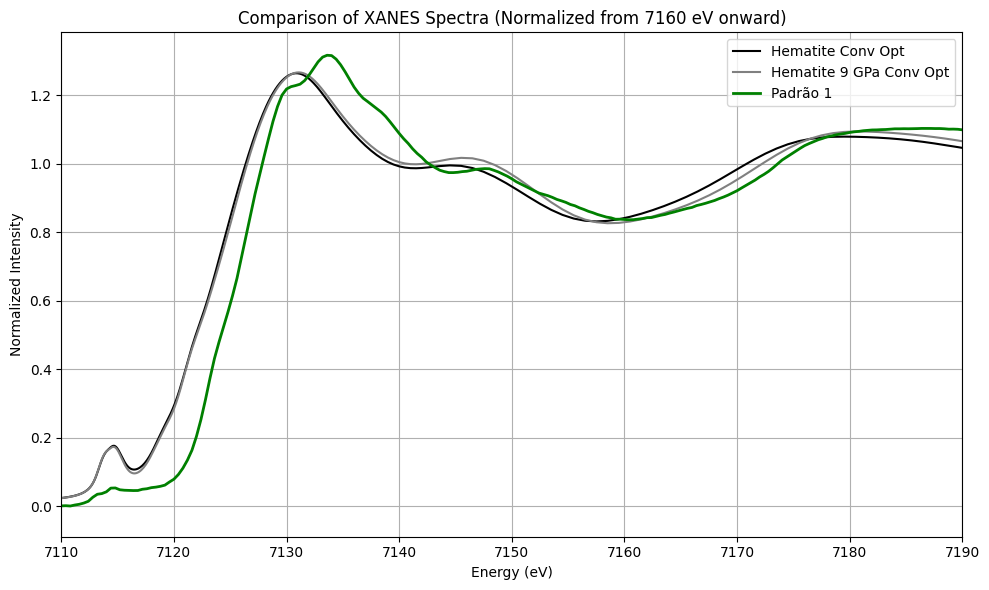

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Simulated Files ---
simulated_files = [
    './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
    './Hematite_Fe2O3_9GPa/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt'
]

simulated_labels = ['Hematite Conv Opt', 'Hematite 9 GPa Conv Opt', 'Goethite Cif', 'Goethite Relaxed']
simulated_colors = ['black', 'gray', 'blue', 'lightblue']

# --- Experimental Files ---
padrao_file = './Raw_T_20230215_padrao_Fe2O3__1_norm1.txt'
#multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'

shift = 1.5

plt.figure(figsize=(10, 6))

# Plot simulated files
for i, file in enumerate(simulated_files):
    try:
        # Use a raw string for the separator
        data = pd.read_csv(file, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        # Normalize with average intensity for Energy >= 7160
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        plt.plot(data['Energy']+shift, data['Intensity'], label=simulated_labels[i], color=simulated_colors[i])
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Plot "Padrão 1" (average of columns 2, 3, 4)
try:
    # Use a raw string for the separator
    df_padrao = pd.read_csv(padrao_file, sep=r'\s+', header=None, skiprows=3)
    df_padrao['Avg'] = df_padrao[[1, 2, 3]].mean(axis=1)
    plt.plot(df_padrao[0], df_padrao['Avg'], label='Padrão 1', color='green', linewidth=2, linestyle='-')
    #df_goe1 = pd.read_csv(goe1, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    #df_goe2 = pd.read_csv(goe2, sep=r'\s+', header=None, names=['Energy', 'Intensity'])
    #plt.plot(df_goe1['Energy'], df_goe1['Intensity'], label='Goethite 0007', color='lightgreen', linestyle='--')
    #plt.plot(df_goe2['Energy'], df_goe2['Intensity'], label='Goethite FeOOH 0001', color='darkgray', linestyle='--')
except Exception as e:
    print(f"Error processing padrão file: {e}")

# Plot average of 25 columns from experimental multi-spectra file
try:
    # Use a raw string for the separator
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)
    #plt.plot(df_multi[0], df_multi['Avg'], label='Exp1 (avg of 25)', color='navy', linestyle='--', linewidth=2)
except Exception as e:
    print(f"Error processing experimental file: {e}")

# Plot formatting
plt.xlabel("Energy (eV)")
plt.ylabel("Normalized Intensity")
plt.xlim(7110, 7190)
plt.title("Comparison of XANES Spectra (Normalized from 7160 eV onward)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optimized Convolution, all spectra.

Plotting specified files...
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt


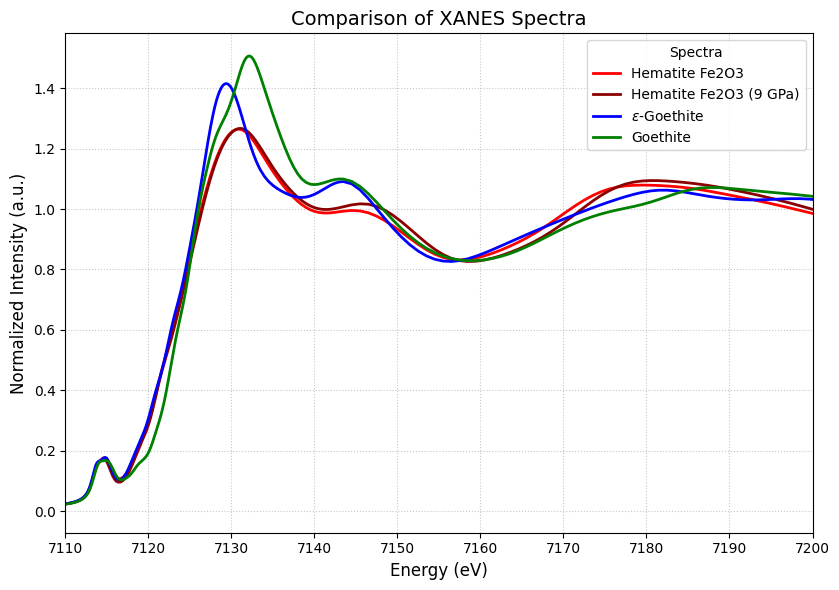

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Files to Plot ---

# List of the four specific files to be plotted
files_to_plot = [
    './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
    './Hematite_Fe2O3_9GPa/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
    './E-FeOOH/convs/fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt',
    './Goethite/relaxed/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt',
]

# Labels for each file to appear in the legend
labels = [
    'Hematite Fe2O3',
    'Hematite Fe2O3 (9 GPa)',
    r'$\varepsilon$-Goethite',
    'Goethite'
]

# Colors for each plot line
colors = ['red', 'darkred', 'blue', 'green']

shift = 1.5  # Energy shift for all files in the plot to avoid overlap

# --- Plotting ---

plt.figure(figsize=(10, 6)) # Set figure size for better readability

print("Plotting specified files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV, as used in previous scripts
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            # If normalization fails, plot original intensity as a fallback
            pass 

        # Plot the spectrum with the specified shift, label, and color
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors[i], # Use the predefined color
                 linewidth=2.0) # Set a consistent linewidth
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of XANES Spectra", fontsize=14)
plt.legend(title="Spectra", loc="upper right") # Place legend outside the plot area
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7200) # Set X-axis limits for better focus, consistent with previous plots
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend on the right
plt.show() # Display the plot


# Optimized Convolution, all spectra and experimental.

Plotting specified files...
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


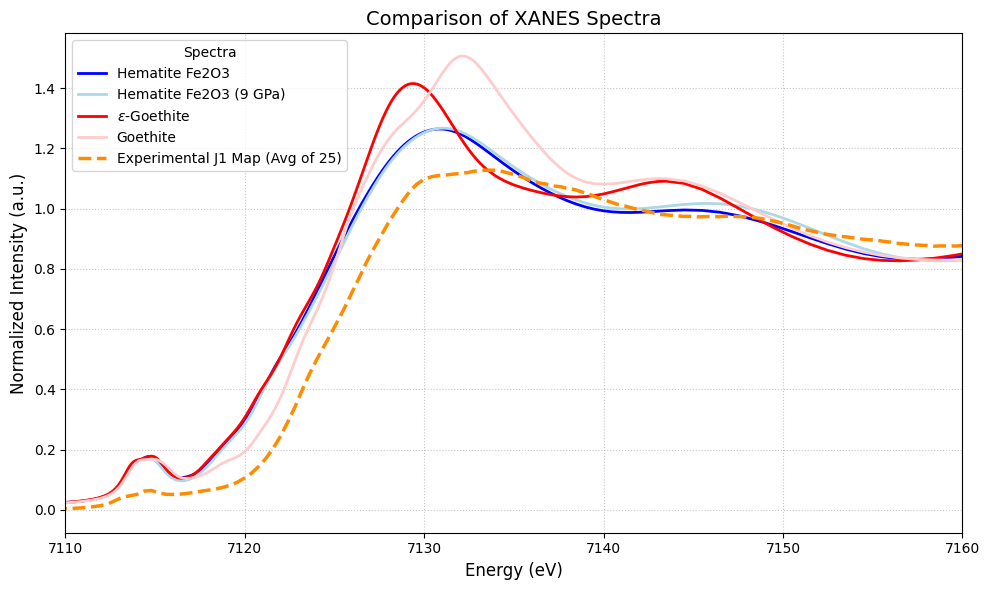

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Files to Plot ---

# List of the four specific files to be plotted
files_to_plot = [
    './Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
    './Hematite_Fe2O3_9GPa/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
    './E-FeOOH/convs/fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt',
    './Goethite/relaxed/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt',
]

# Labels for each file to appear in the legend
labels = [
    'Hematite Fe2O3',
    'Hematite Fe2O3 (9 GPa)',
    r'$\varepsilon$-Goethite', # Using LaTeX for epsilon-Goethite
    'Goethite'
]

# Colors for each plot line
colors = ['blue', 'lightblue', 'red', '#FFCCCC']

shift = 1.5  # Energy shift for all files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(10, 6)) # Set figure size for better readability

print("Plotting specified files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV, as used in previous scripts
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            # If normalization fails, plot original intensity as a fallback (no explicit action needed,
            # as division by zero is prevented, and data remains un-normalized if mean_intensity is 0)
            pass 

        # Plot the spectrum with the specified shift, label, and color
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors[i], # Use the predefined color
                 linewidth=2.0) # Set a consistent linewidth
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title("Comparison of XANES Spectra", fontsize=14)
# Adjust legend position to avoid overlap, using 'upper right' for better default placement
# Also remove `bbox_to_anchor` and `rect` for simpler default management, but retain if complex layout is needed
plt.legend(title="Spectra", loc="upper left")
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7160) # Set X-axis limits as per your latest request
# Removed tight_layout(rect=...) to let legend auto-position with loc="upper right"
plt.tight_layout() # Adjust layout to prevent labels/title from overlapping
plt.show() # Display the plot


# Fe off center, $\varepsilon$-Goethite

Plotting specified simulated files...
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


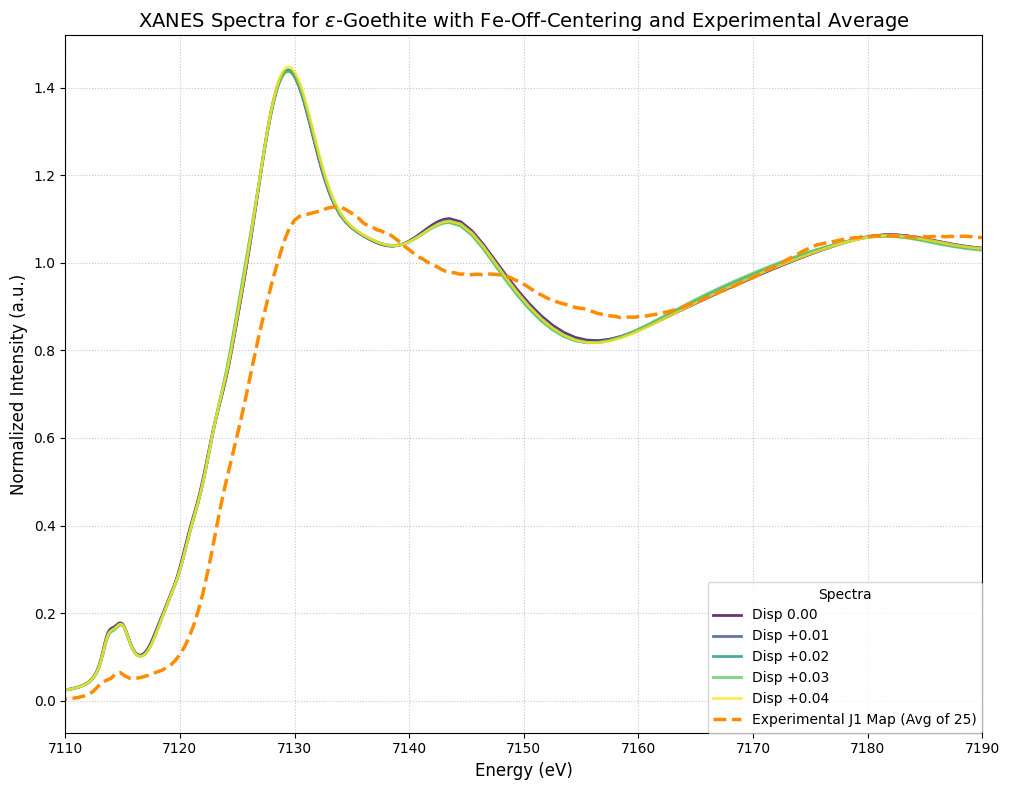

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
    #'./E-FeOOH/Fe-off/new-higher-displacement/off-0.00198288311477531/fdmnes.out_Gm13_conv.txt',
    './E-FeOOH/Fe-off/new-higher-displacement/off0.0/fdmnes.out_Gm13_conv.txt',
    './E-FeOOH/Fe-off/new-higher-displacement/off+0.00198288311477531/fdmnes.out_Gm13_conv.txt',
    './E-FeOOH/Fe-off/new-higher-displacement/off+0.00793153245910122/fdmnes.out_Gm13_conv.txt',
    './E-FeOOH/Fe-off/new-higher-displacement/off+0.00991441557387653/fdmnes.out_Gm13_conv.txt',
    './E-FeOOH/Fe-off/new-higher-displacement/off+0.00396576622955061/fdmnes.out_Gm13_conv.txt',
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    #'Disp -0.01', # Corresponds to off-0.00198...
    'Disp 0.00',  # Corresponds to off0.0
    'Disp +0.01', # Corresponds to off+0.00198...
    'Disp +0.02', # Corresponds to off+0.00793... (approximation for label)
    'Disp +0.03', # Corresponds to off+0.00991... (approximation for label)
    'Disp +0.04', # Corresponds to off+0.00396... (approximation for label)
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for $\varepsilon$-Goethite with Fe-Off-Centering and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot


# Fe off center, Hematite

Plotting specified simulated files...
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


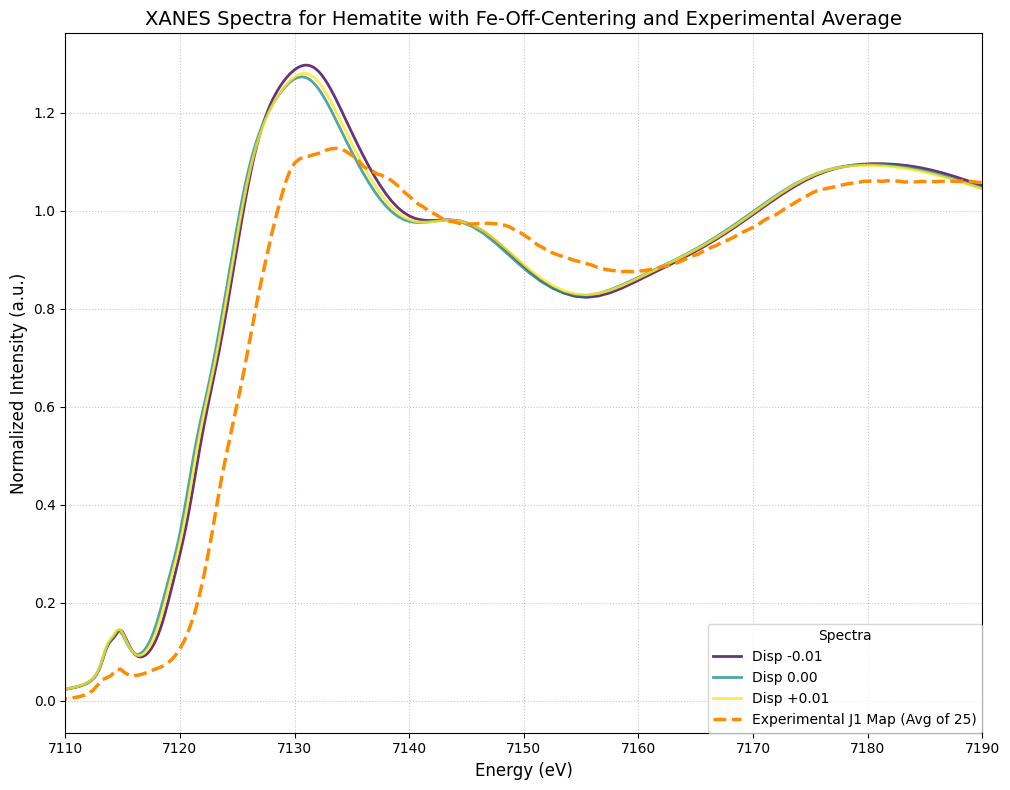

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
    './Hematite_Fe2O3/Fe-Off/new-higher-displacement/off-0.000727120435/fdmnes.out_Gm14_conv.txt',
    './Hematite_Fe2O3/Fe-Off/new-higher-displacement/off0.0/fdmnes.out_Gm14_conv.txt',
    './Hematite_Fe2O3/Fe-Off/new-higher-displacement/off+0.000727120435/fdmnes.out_Gm14_conv.txt',
    #'./Hematite_Fe2O3/Fe-Off/new-higher-displacement/off+0.0014542408695366/fdmnes.out_Gm14_conv.txt',
    #'./Hematite_Fe2O3/Fe-Off/new-higher-displacement/off+0.0021813613043049/fdmnes.out_Gm14_conv.txt',
    #'./Hematite_Fe2O3/Fe-Off/new-higher-displacement/off+0.0029084817390732/fdmnes.out_Gm14_conv.txt',
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Disp -0.01', # Corresponds to off-0.00198...
    'Disp 0.00',  # Corresponds to off0.0
    'Disp +0.01', # Corresponds to off+0.00198...
    'Disp +0.02', # Corresponds to off+0.00793... (approximation for label)
    'Disp +0.03', # Corresponds to off+0.00991... (approximation for label)
    'Disp +0.04', # Corresponds to off+0.00396... (approximation for label)
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite with Fe-Off-Centering and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot


# Fe off center, Hematite 9 GPa

Plotting specified simulated files...
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


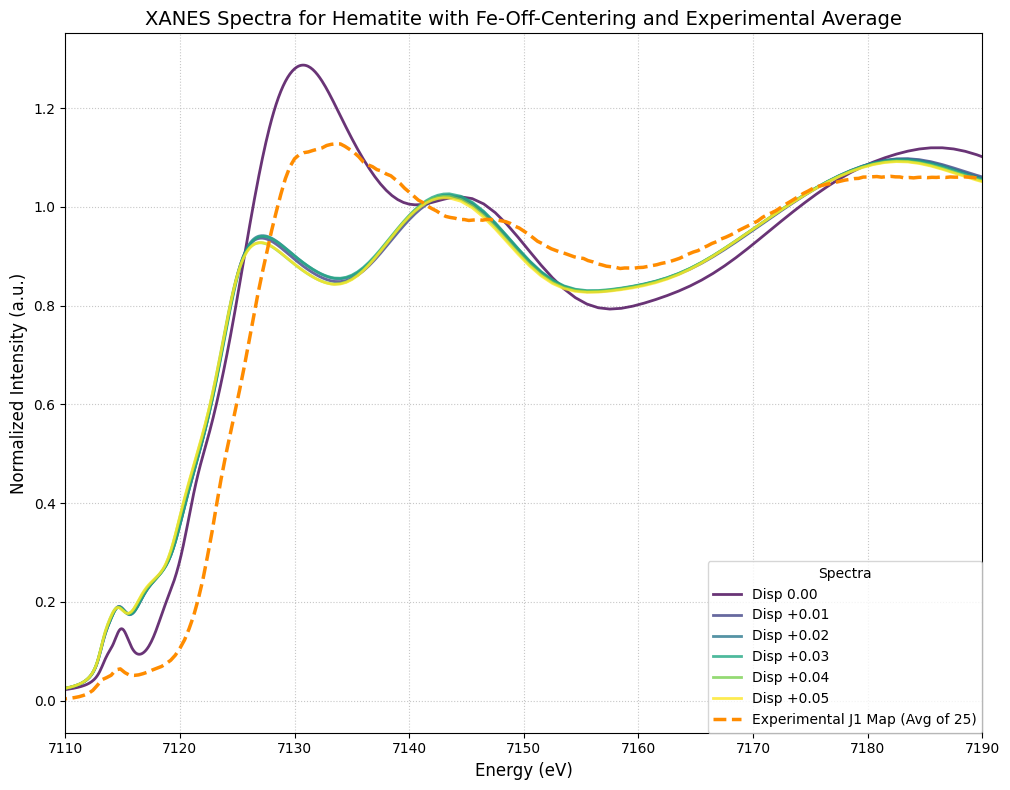

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
    #'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off-0.00073975440664/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off0.0/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off+0.00073975440664/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off+0.00147950881327036/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off+0.00221926321990554/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off+0.00295901762654072/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off+0.0036987720331759/fdmnes.out_Gm14_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    #'Disp -0.01', # Corresponds to off-0.00198...
    'Disp 0.00',  # Corresponds to off0.0
    'Disp +0.01', # Corresponds to off+0.00198...
    'Disp +0.02', # Corresponds to off+0.00793... (approximation for label)
    'Disp +0.03', # Corresponds to off+0.00991... (approximation for label)
    'Disp +0.04', # Corresponds to off+0.00396... (approximation for label)
    'Disp +0.05',
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite with Fe-Off-Centering and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot



# Fe off center, Hematite 9 GPa, all atoms.

Plotting specified simulated files...
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


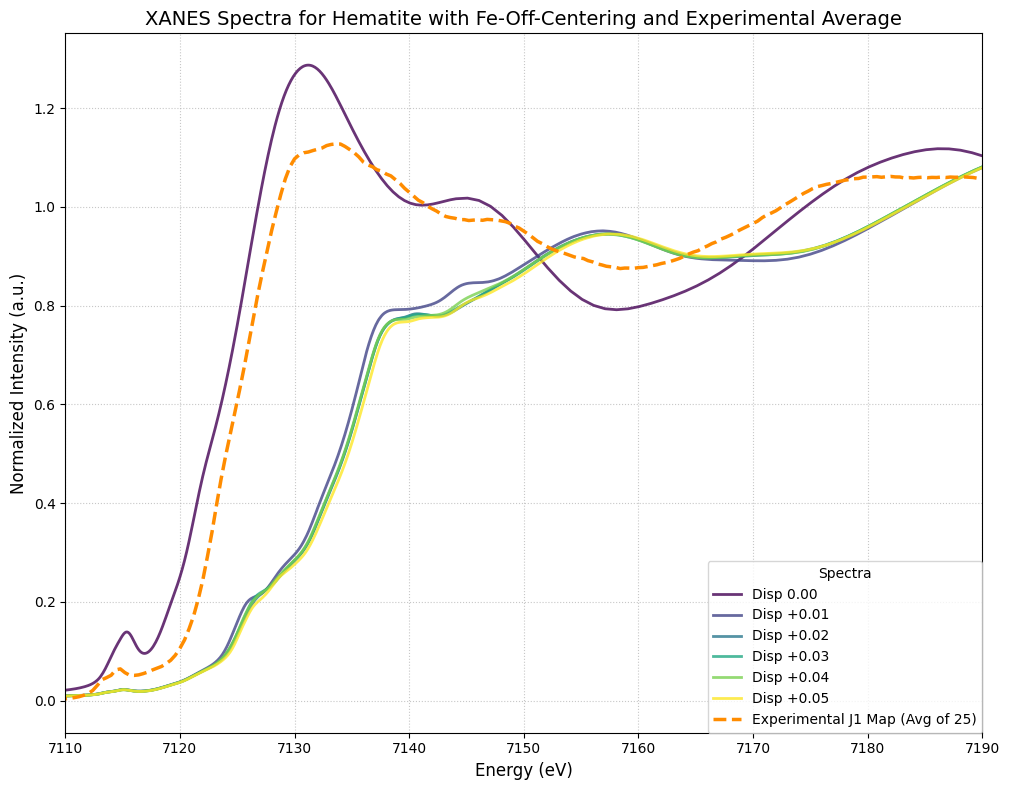

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
    #'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/off-0.00073975440664/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/full/off0.0/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/full/off+0.00073975440664/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/full/off+0.00147950881327036/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/full/off+0.00221926321990554/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/full/off+0.00295901762654072/fdmnes.out_Gm14_conv.txt',
    'Hematite_Fe2O3_9GPa/Fe-Off/new-higher-displacement/full/off+0.0036987720331759/fdmnes.out_Gm14_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    #'Disp -0.01', # Corresponds to off-0.00198...
    'Disp 0.00',  # Corresponds to off0.0
    'Disp +0.01', # Corresponds to off+0.00198...
    'Disp +0.02', # Corresponds to off+0.00793... (approximation for label)
    'Disp +0.03', # Corresponds to off+0.00991... (approximation for label)
    'Disp +0.04', # Corresponds to off+0.00396... (approximation for label)
    'Disp +0.05',
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite with Fe-Off-Centering and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot



# Fe off center Goethite

Plotting specified simulated files...
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


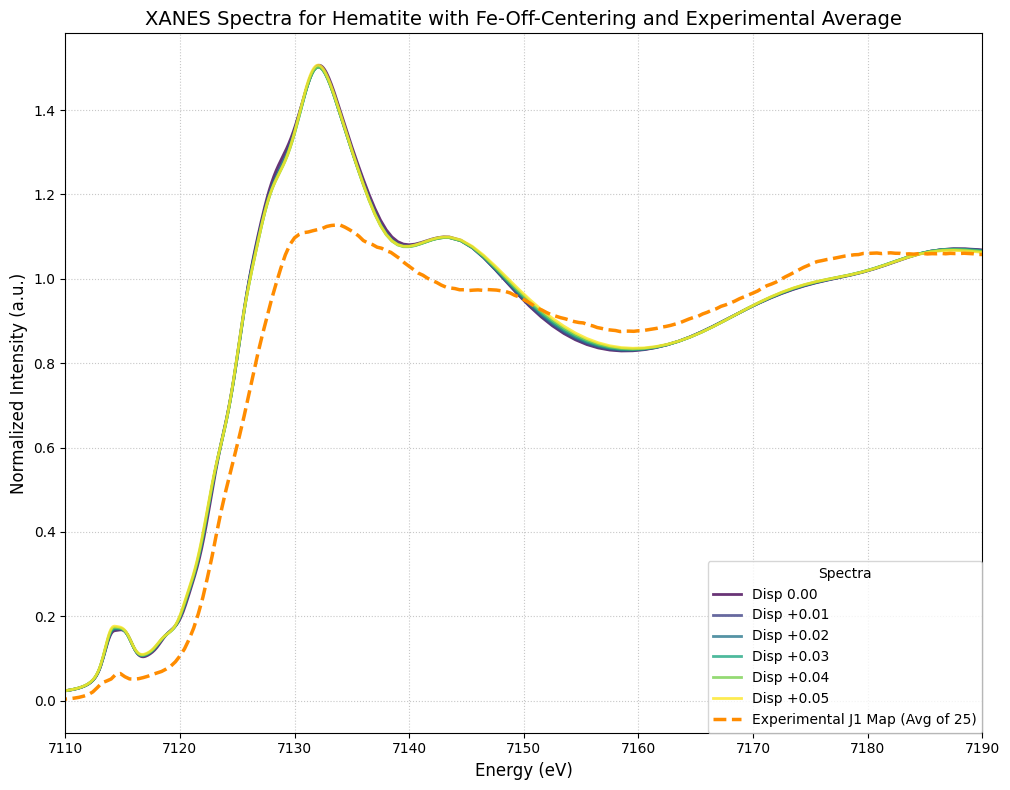

In [109]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
#files_to_plot = [
#   'Goethite/Fe-Off/new-higher-displacement/full/off-0.00218340577975/fdmnes.out_Gm13_conv.txt',
#	'Goethite/Fe-Off/new-higher-displacement/full/off0.0/fdmnes.out_Gm13_conv.txt',
#	'Goethite/Fe-Off/new-higher-displacement/full/off+0.00218340577975/fdmnes.out_Gm13_conv.txt',
#	'Goethite/Fe-Off/new-higher-displacement/full/off+0.00436681155949664/fdmnes.out_Gm13_conv.txt',
#	'Goethite/Fe-Off/new-higher-displacement/full/off+0.00655021733924496/fdmnes.out_Gm13_conv.txt',
#	'Goethite/Fe-Off/new-higher-displacement/full/off+0.00873362311899328/fdmnes.out_Gm13_conv.txt',
#	'Goethite/Fe-Off/new-higher-displacement/full/off+0.0109170288987416/fdmnes.out_Gm13_conv.txt'
#]
files_to_plot = [
	#'Goethite/Fe-Off/new-higher-displacement/off-0.00218340577975/fdmnes.out_Gm13_conv.txt',
	'Goethite/Fe-Off/new-higher-displacement/off0.0/fdmnes.out_Gm13_conv.txt',
	'Goethite/Fe-Off/new-higher-displacement/off+0.00218340577975/fdmnes.out_Gm13_conv.txt',
	'Goethite/Fe-Off/new-higher-displacement/off+0.00436681155949664/fdmnes.out_Gm13_conv.txt',
	'Goethite/Fe-Off/new-higher-displacement/off+0.00655021733924496/fdmnes.out_Gm13_conv.txt',
	'Goethite/Fe-Off/new-higher-displacement/off+0.00873362311899328/fdmnes.out_Gm13_conv.txt',
	'Goethite/Fe-Off/new-higher-displacement/off+0.0109170288987416/fdmnes.out_Gm13_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    #'Disp -0.01', # Corresponds to off-0.00198...
    'Disp 0.00',  # Corresponds to off0.0
    'Disp +0.01', # Corresponds to off+0.00198...
    'Disp +0.02', # Corresponds to off+0.00793... (approximation for label)
    'Disp +0.03', # Corresponds to off+0.00991... (approximation for label)
    'Disp +0.04', # Corresponds to off+0.00396... (approximation for label)
    'Disp +0.05',
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite with Fe-Off-Centering and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# Ni substitutional Hematite

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


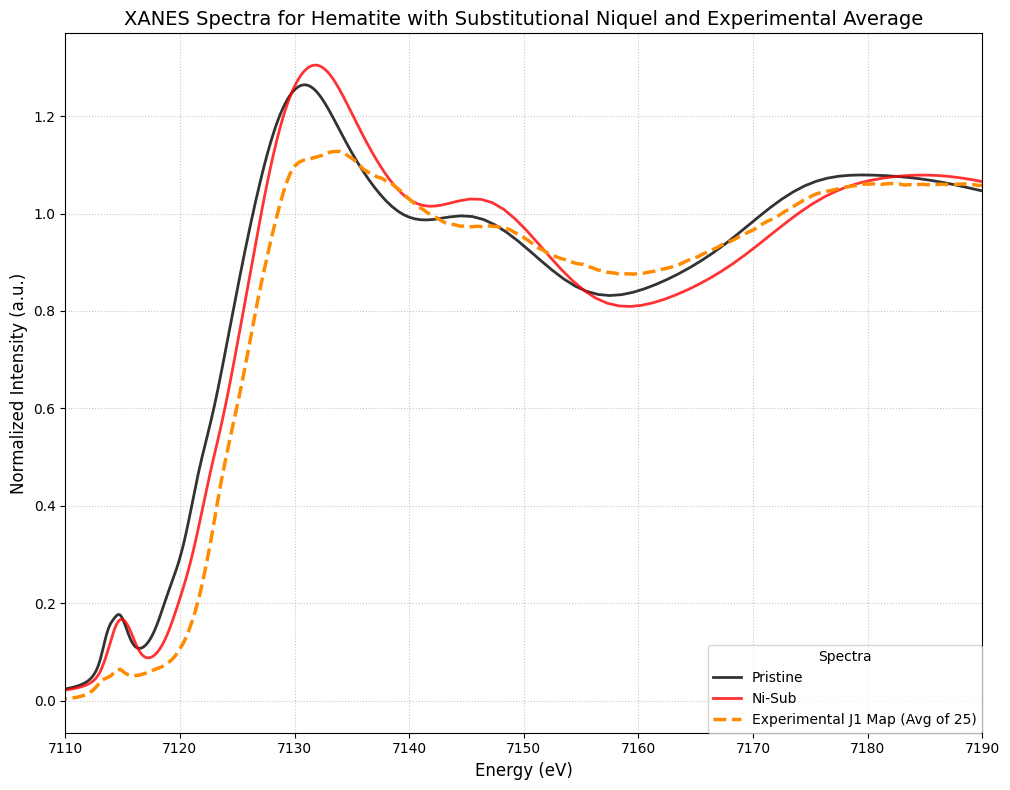

In [97]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
	'./Hematite_Fe2O3/Ni-Sub/select/convs/fdmnes.out_Gm14_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'Ni-Sub', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite with Substitutional Niquel and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# Ni substitutional Hematite 9 GPa

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


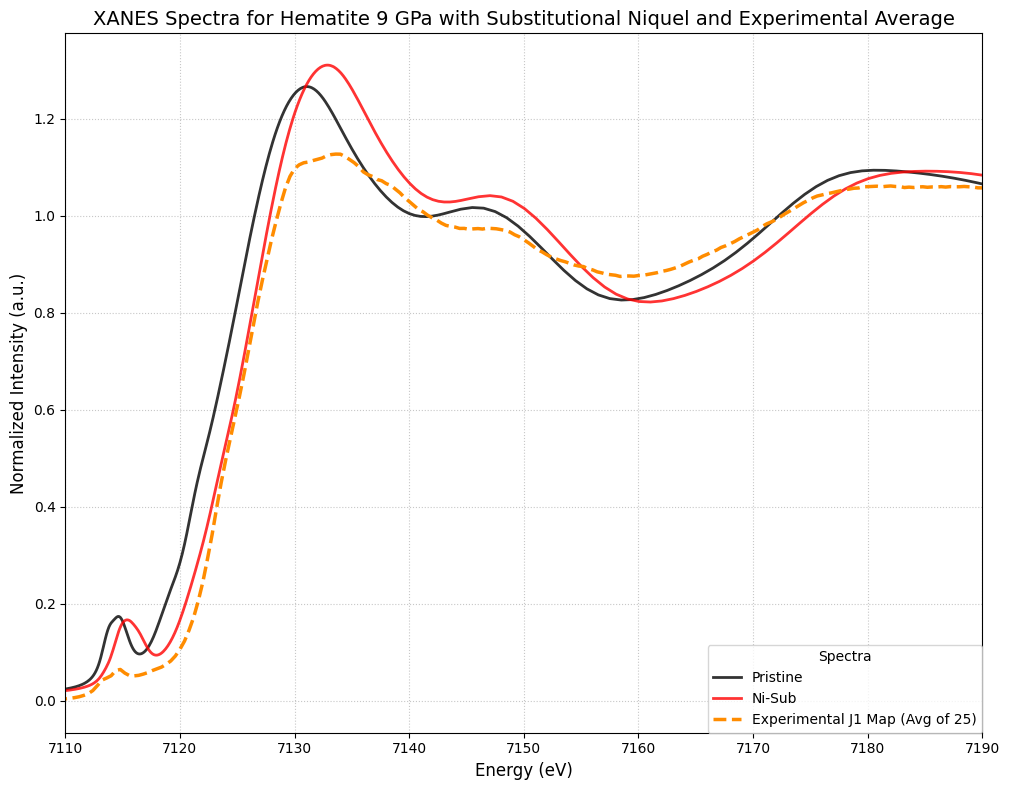

In [98]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./Hematite_Fe2O3_9GPa/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
	'./Hematite_Fe2O3_9GPa/Ni-Sub/conv/fdmnes.out_Gm14_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'Ni-Sub', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite 9 GPa with Substitutional Niquel and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# Ni substitutional $\varepsilon$-Goethite

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt
  - Plotted: fdmnes.out_Gm13_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


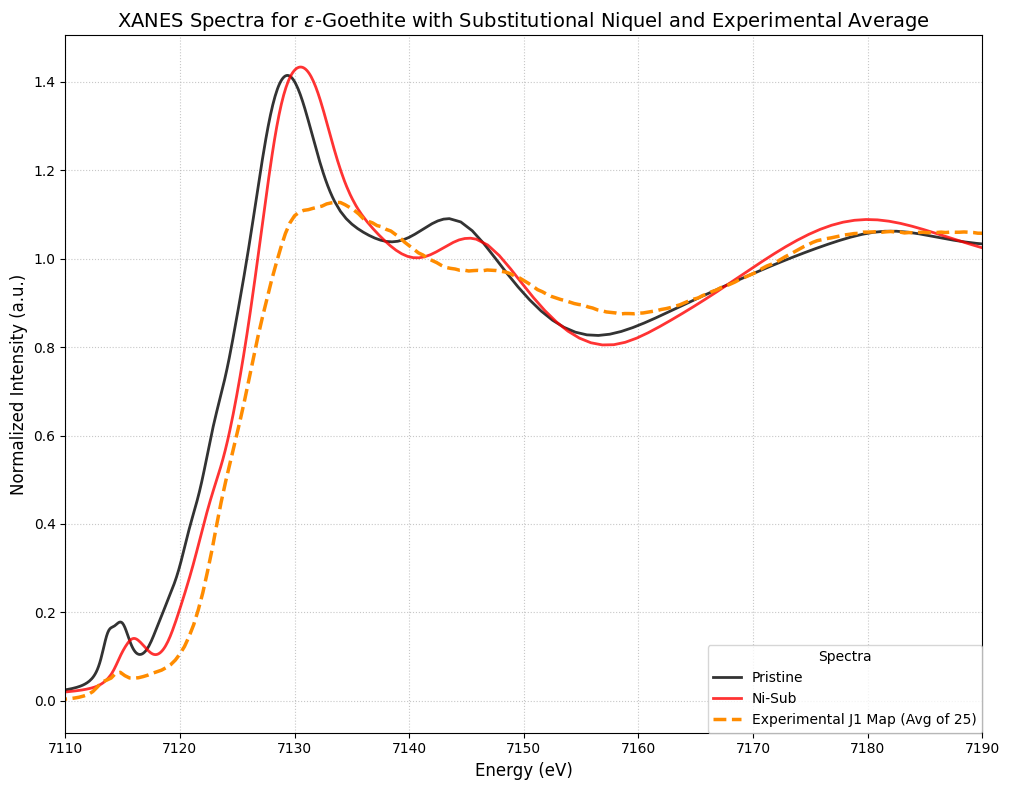

In [99]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./E-FeOOH/convs/fdmnes-restart.out_Gm13.0_26.0_24.0_conv.txt',
	'./E-FeOOH/Ni-Sub/conv/fdmnes.out_Gm13_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'Ni-Sub', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for $\varepsilon$-Goethite with Substitutional Niquel and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# Ni substitutional Goethite

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


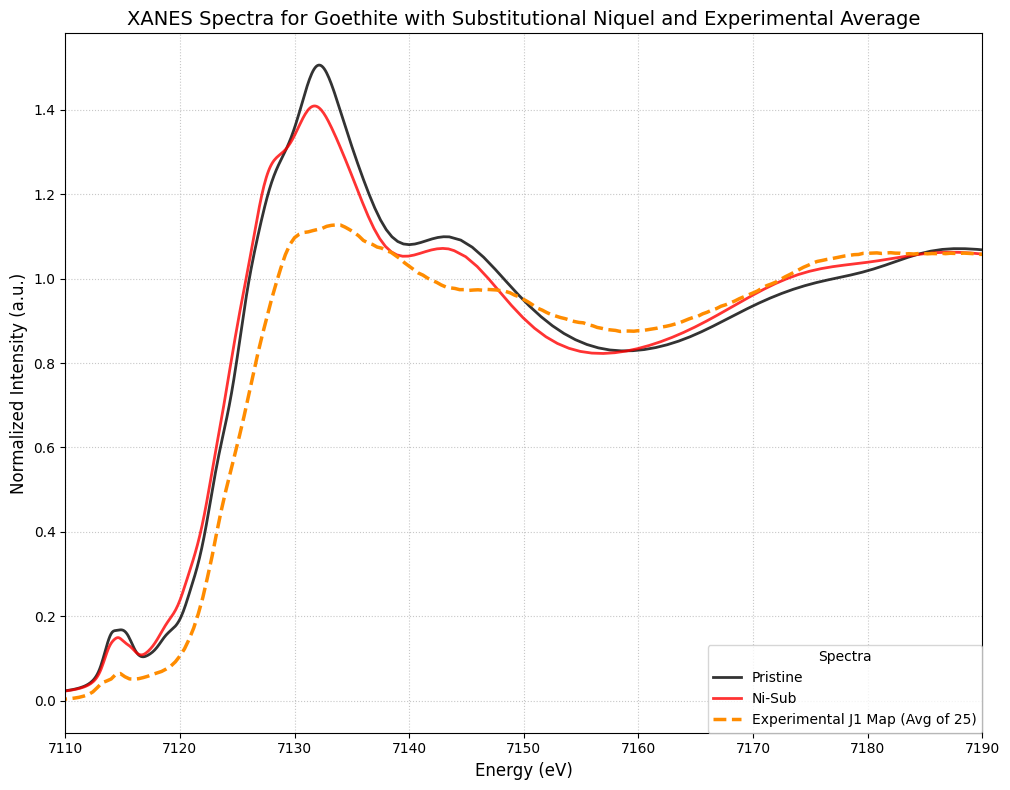

In [100]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./Goethite/relaxed/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt',
	'./Goethite/Ni-Sub/select/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'Ni-Sub', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Goethite with Substitutional Niquel and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# O vacancy, Hematite

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


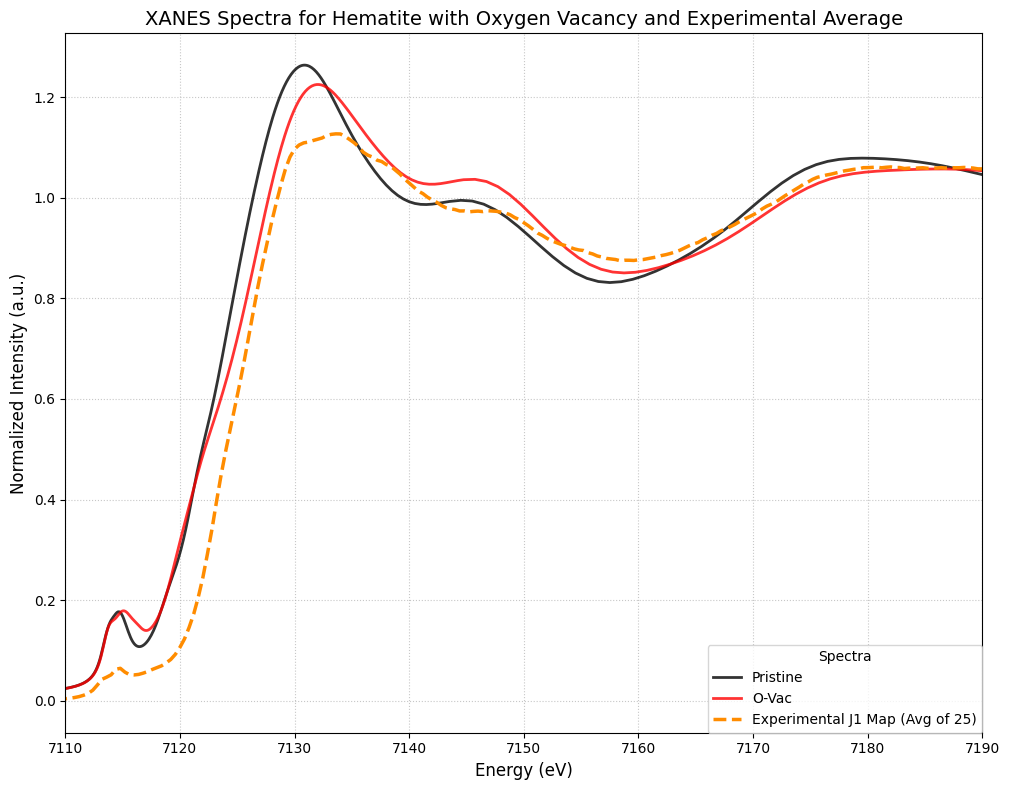

In [102]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./Hematite_Fe2O3/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
	'./Hematite_Fe2O3/O-Vac/convs/fdmnes.out_Gm14_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'O-Vac', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite with Oxygen Vacancy and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# O vacancy, Hematite 9 GPa

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt
  - Plotted: fdmnes.out_Gm14_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


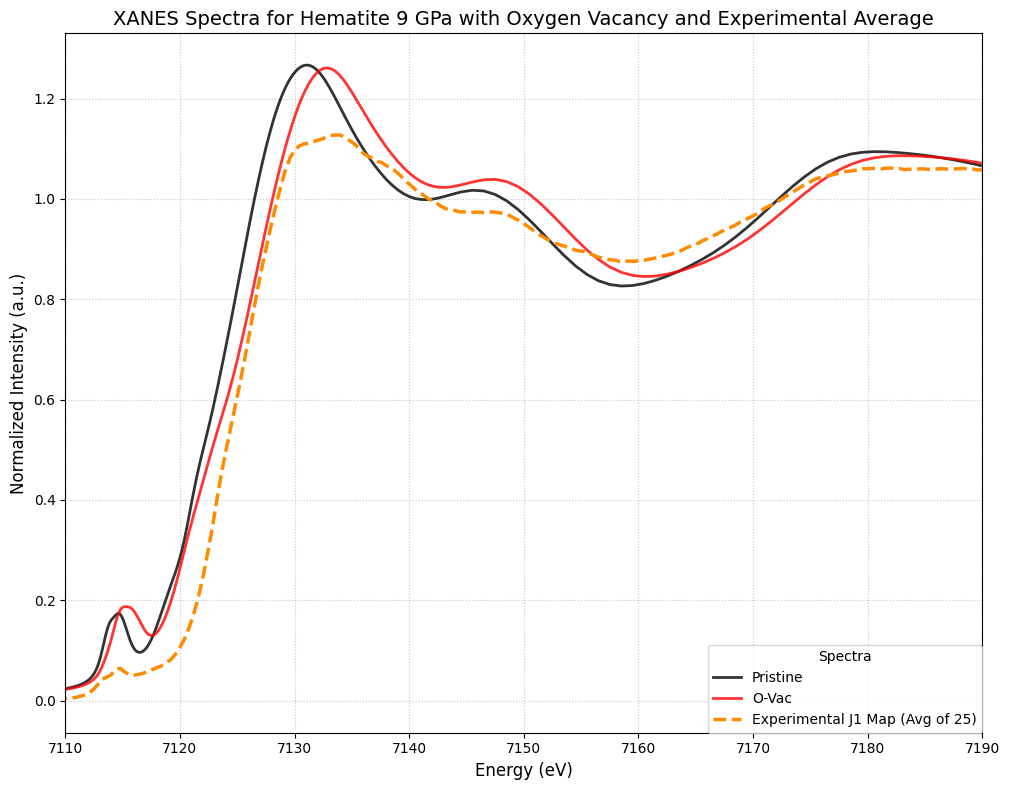

In [103]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./Hematite_Fe2O3_9GPa/convs/fdmnes-restart.out_Gm14.0_20.0_36.0_conv.txt',
	'./Hematite_Fe2O3_9GPa/O-Vac/convs/fdmnes.out_Gm14_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'O-Vac', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Hematite 9 GPa with Oxygen Vacancy and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot




# O vacancy, Goethite

Plotting specified simulated files...
  - Plotted: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt
  - Plotted: fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt

Processing and plotting: ./Raw_VS_20230215_J1_map_xanes__2_norm1.txt
  - Plotted: Experimental J1 Map (Avg of 25)


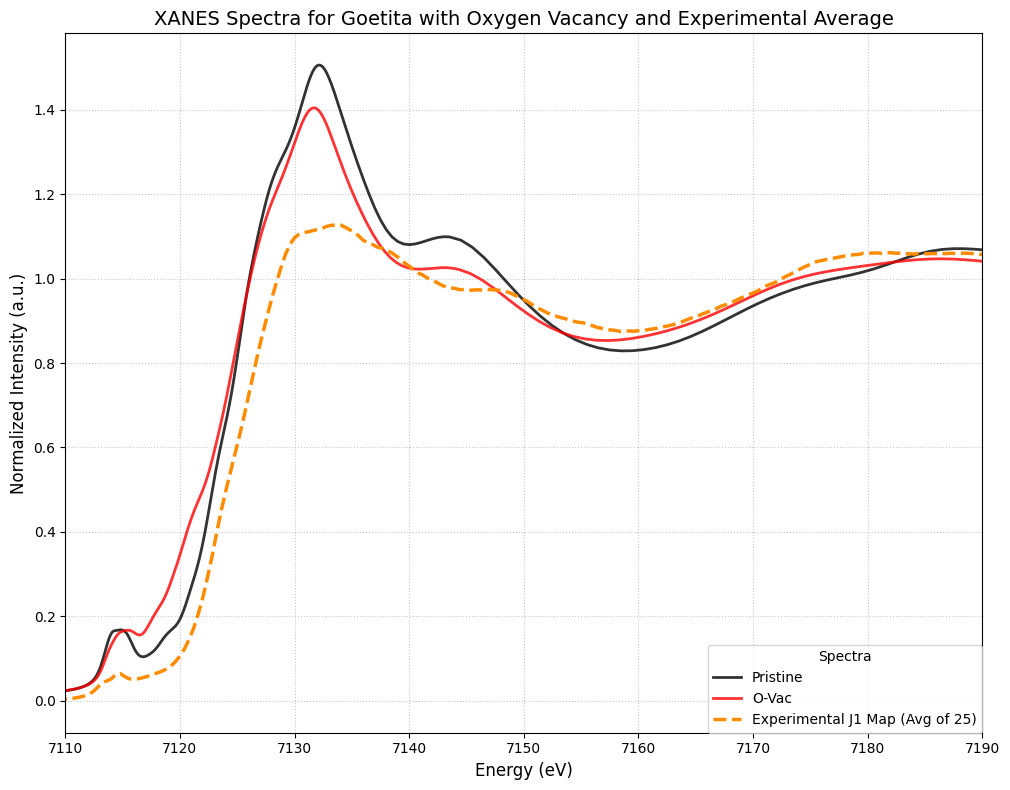

In [104]:


import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Configuration for Simulated Files to Plot ---

# List of the six specific simulated files to be plotted
files_to_plot = [
	'./Goethite/relaxed/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt',
	'./Goethite/O-Vac/select/convs/fdmnes-restart.out_Gm13.0_30.0_18.0_conv.txt'
]

# Labels for each simulated file to appear in the legend
# These labels are descriptive based on the file paths or their physical meaning
labels = [
    'Pristine',
    'O-Vac', 
]

# Colors for each simulated plot line. Using a colormap to get distinct colors.
colors_simulated = ['black', 'red'] #plt.cm.viridis(np.linspace(0, 1, len(files_to_plot)))

shift = 1.5  # Energy shift for all simulated files in the plot to avoid overlap

# --- Experimental Multi-Spectra File Configuration ---
multi_spectra_file = './Raw_VS_20230215_J1_map_xanes__2_norm1.txt'
multi_spectra_label = 'Experimental J1 Map (Avg of 25)'
multi_spectra_color = 'darkorange' # A distinct color for the averaged experimental data

# --- Plotting ---

plt.figure(figsize=(12, 8)) # Increased figure size for more lines and better readability

print("Plotting specified simulated files...")
for i, file_path in enumerate(files_to_plot):
    try:
        # Load data, assuming 'Energy' and 'Intensity' columns
        # header=1 means the second row (0-indexed) is the header for the data
        # names=['Energy', 'Intensity'] assigns column names.
        data = pd.read_csv(file_path, sep=r'\s+', header=1, comment='#', names=['Energy', 'Intensity'])
        
        # Convert columns to numeric, coercing errors, and drop rows with NaN values
        data['Energy'] = pd.to_numeric(data['Energy'], errors='coerce')
        data['Intensity'] = pd.to_numeric(data['Intensity'], errors='coerce')
        data.dropna(inplace=True)

        # Normalize the intensity data
        # Normalization reference range is Energy >= 7160 eV
        mean_intensity = data[data['Energy'] >= 7160]['Intensity'].mean()
        if pd.notna(mean_intensity) and mean_intensity != 0:
            data['Intensity'] /= mean_intensity
        else:
            print(f"Warning: Could not normalize {os.path.basename(file_path)} (no data >= 7160 eV or zero mean), plotting without normalization.")
            pass 

        # Determine linestyle: dashed for the first plot ('Disp -0.01'), solid for others
        #linestyle = '--' if i == 0 else '-'

        # Plot the spectrum with the specified shift, label, color, and linestyle
        plt.plot(data['Energy'] + shift, data['Intensity'],
                 label=labels[i], # Use the predefined label
                 color=colors_simulated[i], # Use the predefined color from the colormap
                 linewidth=2.0,    # Set a consistent linewidth
                 linestyle=linestyle, # Apply the determined linestyle
                 alpha=0.8) # Add some transparency for multiple lines
        
        print(f"  - Plotted: {os.path.basename(file_path)}")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please ensure the path is correct.")
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# --- Plotting Averaged Experimental Multi-Spectra File ---
print(f"\nProcessing and plotting: {multi_spectra_file}")
try:
    # Load the multi-spectra file. Assuming no header and space-separated values.
    # The first column (index 0) is Energy, and columns 1 to 25 are the spectra to average.
    df_multi = pd.read_csv(multi_spectra_file, sep=r'\s+', header=None)

    # Convert Energy column to numeric
    df_multi[0] = pd.to_numeric(df_multi[0], errors='coerce')

    # Convert intensity columns (1 to 25) to numeric.
    # We create a list of columns to check for NaNs to ensure robustness.
    intensity_cols_to_avg = list(range(1, 26))
    for col_idx in intensity_cols_to_avg:
        df_multi[col_idx] = pd.to_numeric(df_multi[col_idx], errors='coerce')

    # Drop rows where the Energy column or any of the intensity columns to be averaged are NaN
    df_multi.dropna(subset=[0] + intensity_cols_to_avg, inplace=True)

    # Calculate the average of columns 1 through 25 (0-indexed: 1 to 25 inclusive)
    df_multi['Avg'] = df_multi.iloc[:, 1:26].mean(axis=1)

    # Normalize the averaged intensity data
    # Normalization reference range is Energy >= 7160 eV
    mean_intensity_avg = df_multi[df_multi[0] >= 7160]['Avg'].mean()
    if pd.notna(mean_intensity_avg) and mean_intensity_avg != 0:
        df_multi['Avg'] /= mean_intensity_avg
    else:
        print(f"Warning: Could not normalize averaged spectrum from {multi_spectra_file} (no data >= 7160 eV or zero mean), plotting without normalization.")
        pass

    # Plot the averaged spectrum
    plt.plot(df_multi[0], df_multi['Avg'],
             label=multi_spectra_label,
             color=multi_spectra_color,
             linestyle='--', # Use a dashed line for experimental averages
             linewidth=2.5) # Slightly thicker line for emphasis
    print(f"  - Plotted: {multi_spectra_label}")

except FileNotFoundError:
    print(f"Error: Multi-spectra file not found at {multi_spectra_file}. Please ensure the path is correct.")
except Exception as e:
    print(f"Error processing multi-spectra file {multi_spectra_file}: {e}")

# --- Plot Formatting ---
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Normalized Intensity (a.u.)", fontsize=12)
plt.title(r"XANES Spectra for Goetita with Oxygen Vacancy and Experimental Average", fontsize=14)
# Place legend outside the plot area on the right
plt.legend(title="Spectra", loc="lower right", borderaxespad=0.)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.xlim(7110, 7190) # Set X-axis limits
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for the legend
plt.show() # Display the plot


